# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

### Path

In [39]:
DATA_PATH = './data/'
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

### Metadata

In [40]:
NB15_FEATURES = 'UNSW-NB15_features-modified.csv'

In [41]:
metadata = pd.read_csv(DATA_PATH + TRAIN_PATH + NB15_FEATURES)

metadata

No.               Name    Type   \
0     5              proto  nominal   
1     6              state  nominal   
2     7                dur    Float   
3     8             sbytes  Integer   
4     9             dbytes  Integer   
5    10               sttl  Integer   
6    11               dttl  Integer   
7    12              sloss  Integer   
8    13              dloss  Integer   
9    14            service  nominal   
10   15              sload    Float   
11   16              dload    Float   
12   17              spkts  integer   
13   18              dpkts  integer   
14   19               swin  integer   
15   20               dwin  integer   
16   21              stcpb  integer   
17   22              dtcpb  integer   
18   23              smean  integer   
19   24              dmean  integer   
20   25        trans_depth  integer   
21   26  response_body_len  integer   
22   27               sjit    Float   
23   28               djit    Float   
24   31             sinpkt    Float   
25   32             dinpkt    Float   
26   33             tcprtt    Float   
27   34             synack    Float   
28   35             ackdat    Float   
29   36    is_sm_ips_ports   Binary   
30   37       ct_state_ttl  Integer   
31   38   ct_flw_http_mthd  Integer   
32   39       is_ftp_login   Binary   
33   40         ct_ftp_cmd  integer   
34   41         ct_srv_src  integer   
35   42         ct_srv_dst  integer   
36   43         ct_dst_ltm  integer   
37   44         ct_src_ltm  integer   
38   45   ct_src_dport_ltm  integer   
39   46   ct_dst_sport_ltm  integer   
40   47     ct_dst_src_ltm  integer   
41   48         attack_cat  nominal   
42   49              label   binary   

                                          Description feature_type  
0                                Transaction protocol         flow  
1   Indicates to the state and its dependent proto...        basic  
2                               Record total duration        basic  
3            Source to destination transaction bytes         basic  
4             Destination to source transaction bytes        basic  
5           Source to destination time to live value         basic  
6            Destination to source time to live value        basic  
7            Source packets retransmitted or dropped         basic  
8        Destination packets retransmitted or dropped        basic  
9   http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...        basic  
10                             Source bits per second        basic  
11                        Destination bits per second        basic  
12                Source to destination packet count         basic  
13                 Destination to source packet count        basic  
14              Source TCP window advertisement value      content  
15         Destination TCP window advertisement value      content  
16                    Source TCP base sequence number      content  
17               Destination TCP base sequence number      content  
18  Mean of the ?ow packet size transmitted by the...      content  
19  Mean of the ?ow packet size transmitted by the...      content  
20  Represents the pipelined depth into the connec...      content  
21  Actual uncompressed content size of the data t...      content  
22                               Source jitter (mSec)         time  
23                          Destination jitter (mSec)         time  
24             Source interpacket arrival time (mSec)         time  
25        Destination interpacket arrival time (mSec)         time  
26  TCP connection setup round-trip time, the sum ...         time  
27  TCP connection setup time, the time between th...         time  
28  TCP connection setup time, the time between th...         time  
29  If source (1) and destination (3)IP addresses ...   additional  
30  No. for each state (6) according to specific r...   additional  
31  No. of flows that has methods such as Get and ...   additional  
32  If the

### Train

In [42]:
ADDITIONAL_FEATURES_TRAIN = 'additional_features_train.csv'
BASIC_FEATURES_TRAIN = 'basic_features_train.csv'
CONTENT_FEATURES_TRAIN = 'content_features_train.csv'
FLOW_FEATURES_TRAIN = 'flow_features_train.csv'
LABELS_TRAIN = 'labels_train.csv'
TIME_FEATURES_TRAIN = 'time_features_train.csv'

In [43]:
dataset_paths_train = [
    ADDITIONAL_FEATURES_TRAIN,
    BASIC_FEATURES_TRAIN,
    CONTENT_FEATURES_TRAIN,
    FLOW_FEATURES_TRAIN,
    LABELS_TRAIN,
    TIME_FEATURES_TRAIN
]

In [44]:
all_data_train = [pd.read_csv(DATA_PATH + TRAIN_PATH + dp) for dp in dataset_paths_train]

df_train = all_data_train[0]

for df_i in all_data_train[1:]:
    df_train = pd.merge(df_train, df_i, on='id')

df_train

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
0                   0.0           0.0               0.0           0.0   
1                   0.0           2.0               0.0           0.0   
2                   0.0           NaN               0.0           0.0   
3                   0.0           0.0               0.0           0.0   
4                   0.0           0.0               0.0           0.0   
...                 ...           ...               ...           ...   
175336              0.0           2.0               0.0           0.0   
175337              0.0           1.0               0.0           1.0   
175338              0.0           2.0               0.0           NaN   
175339              0.0           2.0               0.0           0.0   
175340              0.0           2.0               0.0           0.0   

        ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
0              0.0        11.0         NaN         5.0         4.0   
1              0.0        10.0        10.0        10.0        10.0   
2              0.0         4.0         4.0         2.0         2.0   
3              0.0         9.0         9.0         3.0         2.0   
4              0.0         3.0         3.0         4.0         3.0   
...            ...         ...         ...         ...         ...   
175336         0.0        38.0        38.0        32.0         NaN   
175337         1.0         1.0         1.0         2.0         3.0   
175338         0.0        33.0        33.0        16.0        16.0   
175339         0.0        36.0        36.0         NaN        37.0   
175340         0.0        24.0        24.0        16.0        16.0   

        ct_src_dport_ltm  ...  proto  attack_cat  label          sjit  \
0                    2.0  ...    tcp      Normal      0   4449.110313   
1                    NaN  ...    udp     Generic      1      0.000000   
2                    1.0  ...    tcp    Exploits      1   8561.040438   
3                    2.0  ...    tcp      Normal      0   4053.086020   
4                    1.0  ...    udp      Normal      0      0.000000   
...                  ...  ...    ...         ...    ...           ...   
175336              32.0  ...    udp     Generic      1      0.000000   
175337               NaN  ...    tcp    Exploits      1  15464.286700   
175338              16.0  ...    udp     Generic      1      0.000000   
175339              36.0  ...    udp     Generic      1      0.000000   
175340              16.0  ...    udp     Generic      1      0.000000   

               djit      sinpkt      dinpkt    tcprtt    synack    ackdat  
0       3234.831566   11.845558    6.261361       NaN  0.000444  0.000114  
1          0.000000    0.009000    0.000000  0.000000  0.000000       NaN  
2        249.950547  165.386453  172.345750  0.158826  0.057902  0.100924  
3       2918.730804    8.669644    4.496707  0.000558  0.000448       NaN  
4          0.000000    0.008000    0.007000  0.000000  0.000000  0.000000  
...             ...         ...         ...       ...       ...       ...  
175336     0.000000    0.005000    0.000000  0.000000  0.000000  0.000000  
175337   531.848125  193.445428  209.600766  0.066524  0.047738  0.018786  
175338     0.000000    0.008000    0.000000  0.000000  0.000000  0.000000  
175339     0.000000    0.004000    0.000000  0.000000  0.000000       NaN  
175340     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000  

[175341 rows x 44 columns]

### Test

In [45]:
ADDITIONAL_FEATURES_TEST = 'additional_features_test.csv'
BASIC_FEATURES_TEST = 'basic_features_test.csv'
CONTENT_FEATURES_TEST = 'content_features_test.csv'
FLOW_FEATURES_TEST = 'flow_features_test.csv'
TIME_FEATURES_TEST = 'time_features_test.csv'

In [46]:
dataset_paths_test = [
    ADDITIONAL_FEATURES_TEST,
    BASIC_FEATURES_TEST,
    CONTENT_FEATURES_TEST,
    FLOW_FEATURES_TEST,
    TIME_FEATURES_TEST
]

In [47]:
all_data_test = [pd.read_csv(DATA_PATH + TEST_PATH + dp) for dp in dataset_paths_test]

df_test = all_data_test[0]

for df_i in all_data_test[1:]:
    df_test = pd.merge(df_test, df_i, on='id')

df_test

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
0                  0.0           1.0               0.0           0.0   
1                  0.0           1.0               0.0           NaN   
2                  0.0           1.0               0.0           0.0   
3                  0.0           2.0               0.0           0.0   
4                  NaN           0.0               NaN           0.0   
...                ...           ...               ...           ...   
20578              0.0           1.0               0.0           0.0   
20579              0.0           0.0               0.0           0.0   
20580              0.0           2.0               0.0           0.0   
20581              0.0           2.0               0.0           0.0   
20582              0.0           2.0               0.0           0.0   

       ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
0             0.0         5.0         5.0         2.0         2.0   
1             0.0         6.0         6.0         1.0         1.0   
2             0.0         4.0         4.0         1.0         2.0   
3             0.0        10.0         4.0         2.0         4.0   
4             0.0        13.0        11.0        10.0         7.0   
...           ...         ...         ...         ...         ...   
20578         0.0         2.0         2.0         1.0         1.0   
20579         0.0        14.0         7.0         1.0         9.0   
20580         0.0         6.0         6.0         NaN         4.0   
20581         0.0        11.0        11.0         4.0         8.0   
20582         0.0         5.0         5.0         NaN         5.0   

       ct_src_dport_ltm  ...  trans_depth  response_body_len  proto  \
0                   2.0  ...          0.0                0.0    tcp   
1                   1.0  ...          0.0                0.0    tcp   
2                   1.0  ...          0.0                0.0    tcp   
3                   2.0  ...          0.0                0.0    udp   
4                   6.0  ...          0.0                0.0    tcp   
...                 ...  ...          ...                ...    ...   
20578               1.0  ...          0.0                0.0    tcp   
20579               1.0  ...          0.0                0.0    tcp   
20580               4.0  ...          0.0                0.0    udp   
20581               4.0  ...          0.0                0.0   unas   
20582               1.0  ...          0.0                0.0   rsvp   

              sjit        djit     sinpkt      dinpkt    tcprtt    synack  \
0      2737.954123  118.833969  48.756556   76.593602  0.165117  0.072001   
1      2938.299144  165.780563  49.812539  109.557602  0.223604  0.100248   
2      4287.453629  129.471406  69.765530   94.395906  0.113189  0.082498   
3         0.000000    0.000000   0.001000    0.000000  0.000000  0.000000   
4      1119.063538   26.748141  17.628799   15.543294  0.000655  0.000526   
...            ...         ...        ...         ...       ...       ...   
20578  1902.551328  143.722203  16.088482   87.730055  0.117474  0.071119   
20579   858.139465   22.118752  14.832222   13.803000  0.000647  0.000491   
20580     0.000000    0.000000        NaN    0.000000  0.000000       NaN   
20581     0.000000    0.000000   0.011000    0.000000  0.000000  0.000000   
20582     0.000000    0.000000   0.009000         NaN  0.000000  0.000000   

         ackdat  
0      0.093116  
1      0.123356  
2      0.030691  
3      0.000000  
4      0.000129  
...         ...  
20578  0.046355  
20579  0.000156  
20580  0.000000  
20581  0.000000  
20582  0.000000  

[20583 rows x 42 columns]

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [48]:
# df_train['is_ftp_login'] = df_train['is_ftp_login'].replace({0: 'false', 1:'true'})

# df_train['is_sm_ips_ports'] = df_train['is_sm_ips_ports'].replace({0: 'false', 1:'true'})

# df_train['service'] = df_train['service'].replace({'-' : 'unknown'})

In [49]:
data_size = df_train.shape
num_instances, num_features = data_size

data_size

(175341, 44)

In [50]:
df_train.head()

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0           0.0               0.0           0.0         0.0   
1              0.0           2.0               0.0           0.0         0.0   
2              0.0           NaN               0.0           0.0         0.0   
3              0.0           0.0               0.0           0.0         0.0   
4              0.0           0.0               0.0           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ...  \
0        11.0         NaN         5.0         4.0               2.0  ...   
1        10.0        10.0        10.0        10.0               NaN  ...   
2         4.0         4.0         2.0         2.0               1.0  ...   
3         9.0         9.0         3.0         2.0               2.0  ...   
4         3.0         3.0         4.0         3.0               1.0  ...   

   proto  attack_cat  label         sjit         djit      sinpkt      dinpkt  \
0    tcp      Normal      0  4449.110313  3234.831566   11.845558    6.261361   
1    udp     Generic      1     0.000000     0.000000    0.009000    0.000000   
2    tcp    Exploits      1  8561.040438   249.950547  165.386453  172.345750   
3    tcp      Normal      0  4053.086020  2918.730804    8.669644    4.496707   
4    udp      Normal      0     0.000000     0.000000    0.008000    0.007000   

     tcprtt    synack    ackdat  
0       NaN  0.000444  0.000114  
1  0.000000  0.000000       NaN  
2  0.158826  0.057902  0.100924  
3  0.000558  0.000448       NaN  
4  0.000000  0.000000  0.000000  

[5 rows x 44 columns]

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              166536 non-null  object 
 14  dur                166619 non-null  float64
 15  sbytes             166780 non-null  float64
 16  db

In [52]:
df_train.isnull().sum()

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
label                   0
sjit                 8738
djit        

In [53]:
df_train.sample(10)

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
124324              0.0           1.0               1.0           0.0   
59058               0.0           2.0               NaN           NaN   
87750               0.0           0.0               0.0           0.0   
155666              NaN           2.0               0.0           0.0   
57282               0.0           1.0               0.0           0.0   
14977               0.0           0.0               0.0           0.0   
106192              0.0           1.0               0.0           1.0   
6811                0.0           2.0               0.0           0.0   
76197               0.0           2.0               0.0           0.0   
8928                0.0           1.0               0.0           0.0   

        ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
124324         0.0         1.0         1.0         1.0         1.0   
59058          0.0        29.0        29.0        19.0        19.0   
87750          0.0        14.0         6.0         1.0         3.0   
155666         0.0         4.0         4.0         2.0         2.0   
57282          0.0         3.0         2.0         1.0         1.0   
14977          0.0        14.0         5.0         4.0         7.0   
106192         1.0         1.0         1.0         1.0         1.0   
6811           0.0        27.0        27.0        15.0        15.0   
76197          0.0        33.0        33.0        18.0        17.0   
8928           NaN         1.0         1.0         2.0         2.0   

        ct_src_dport_ltm  ...  proto  attack_cat  label         sjit  \
124324               1.0  ...    tcp    Exploits      1  1410.634741   
59058               18.0  ...    udp     Generic      1     0.000000   
87750                1.0  ...    NaN      Normal      0    15.551050   
155666               2.0  ...    udp     Fuzzers      1     0.000000   
57282                1.0  ...    tcp    Exploits      1  1646.975844   
14977                1.0  ...    udp      Normal      0     0.566392   
106192               NaN  ...    tcp     Fuzzers      1  6056.275269   
6811                15.0  ...    NaN     Generic      1     0.000000   
76197               17.0  ...    udp     Generic      1     0.000000   
8928                 1.0  ...    tcp    Exploits      1  9659.572646   

               djit      sinpkt      dinpkt    tcprtt    synack    ackdat  
124324   619.576249   29.056108    5.089005  0.030851  0.020961  0.009890  
59058      0.000000    0.006000    0.000000  0.000000  0.000000  0.000000  
87750     12.728207    0.247714    0.219826  0.000621  0.000484  0.000137  
155666     0.000000    0.005000    0.000000  0.000000  0.000000  0.000000  
57282     42.774687   32.562862   35.269590  0.028001       NaN  0.013450  
14977      0.278366    0.404000    0.200333  0.000000  0.000000  0.000000  
106192  7205.770218  118.466094  104.490736  0.138344  0.071084  0.067260  
6811       0.000000    0.009000    0.000000  0.000000  0.000000  0.000000  
76197      0.000000    0.009000    0.000000  0.000000  0.000000  0.000000  
8928     267.954531  142.204290  127.853711  0.143430  0.084927  0.058503  

[10 rows x 44 columns]

In [54]:
df_train.dtypes.value_counts()

float64    38
object      4
int64       2
Name: count, dtype: int64

In [55]:
numeric_feats = df_train.select_dtypes(include=np.number)

categorical_feats = df_train.select_dtypes(include='object')

In [56]:
numeric_feats.describe()

is_sm_ips_ports   ct_state_ttl  ct_flw_http_mthd   is_ftp_login  \
count    166595.000000  166706.000000     166694.000000  166694.000000   
mean          0.015799       1.303852          0.132722       0.014974   
std           0.124697       0.954779          0.692019       0.126338   
min           0.000000       0.000000          0.000000       0.000000   
25%           0.000000       1.000000          0.000000       0.000000   
50%           0.000000       1.000000          0.000000       0.000000   
75%           0.000000       2.000000          0.000000       0.000000   
max           1.000000       6.000000         30.000000       4.000000   

          ct_ftp_cmd     ct_srv_src     ct_srv_dst     ct_dst_ltm  \
count  166499.000000  166490.000000  166567.000000  166603.000000   
mean        0.014961       9.304415       9.104384       6.191773   
std         0.125771      10.699782      10.758098       8.050067   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       2.000000       2.000000       1.000000   
50%         0.000000       5.000000       4.000000       2.000000   
75%         0.000000      12.000000      12.000000       7.000000   
max         4.000000      63.000000      62.000000      51.000000   

          ct_src_ltm  ct_src_dport_ltm  ...    trans_depth  response_body_len  \
count  166518.000000     166566.000000  ...  166556.000000       1.665500e+05   
mean        6.952450          5.388116  ...       0.106193       2.157133e+03   
std         8.318103          8.044942  ...       0.794070       5.509898e+04   
min         1.000000          1.000000  ...       0.000000       0.000000e+00   
25%         2.000000          1.000000  ...       0.000000       0.000000e+00   
50%         3.000000          1.000000  ...       0.000000       0.000000e+00   
75%         9.000000          5.000000  ...       0.000000       0.000000e+00   
max        60.000000         51.000000  ...     172.000000       6.558056e+06   

               label          sjit           djit         sinpkt  \
count  175341.000000  1.666030e+05  166495.000000  166634.000000   
mean        0.680622  4.993982e+03     604.891720     987.360974   
std         0.466237  4.506783e+04    4082.439167    7246.462797   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  0.000000e+00       0.000000       0.008000   
50%         1.000000  0.000000e+00       0.000000       0.284723   
75%         1.000000  2.511184e+03     114.753348      55.205806   
max         1.000000  1.460480e+06  289388.269700   84371.496000   

              dinpkt         tcprtt         synack         ackdat  
count  166607.000000  166505.000000  166605.000000  166746.000000  
mean       87.763617       0.041331       0.021042       0.020402  
std       987.040024       0.079428       0.043560       0.040619  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.006000       0.000000       0.000000       0.000000  
75%        50.933127       0.065151       0.023235       0.038951  
max     56716.824000       2.518893       2.100352       1.520884  

[8 rows x 40 columns]

In [57]:
num_features = numeric_feats.shape[1]

num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

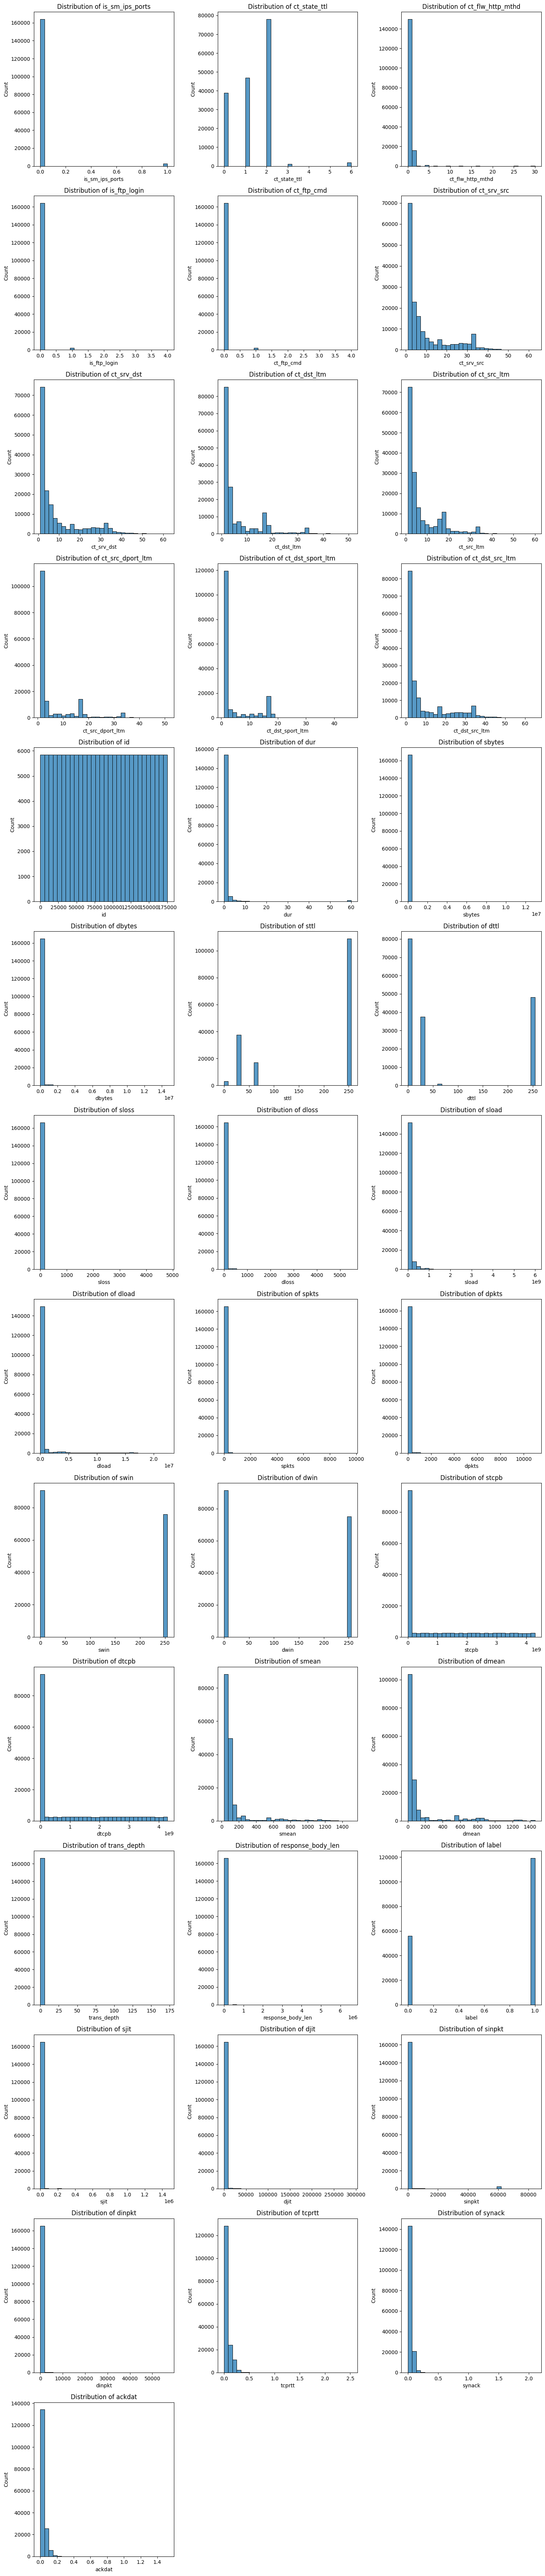

In [58]:
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_feats.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(numeric_feats[column], bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

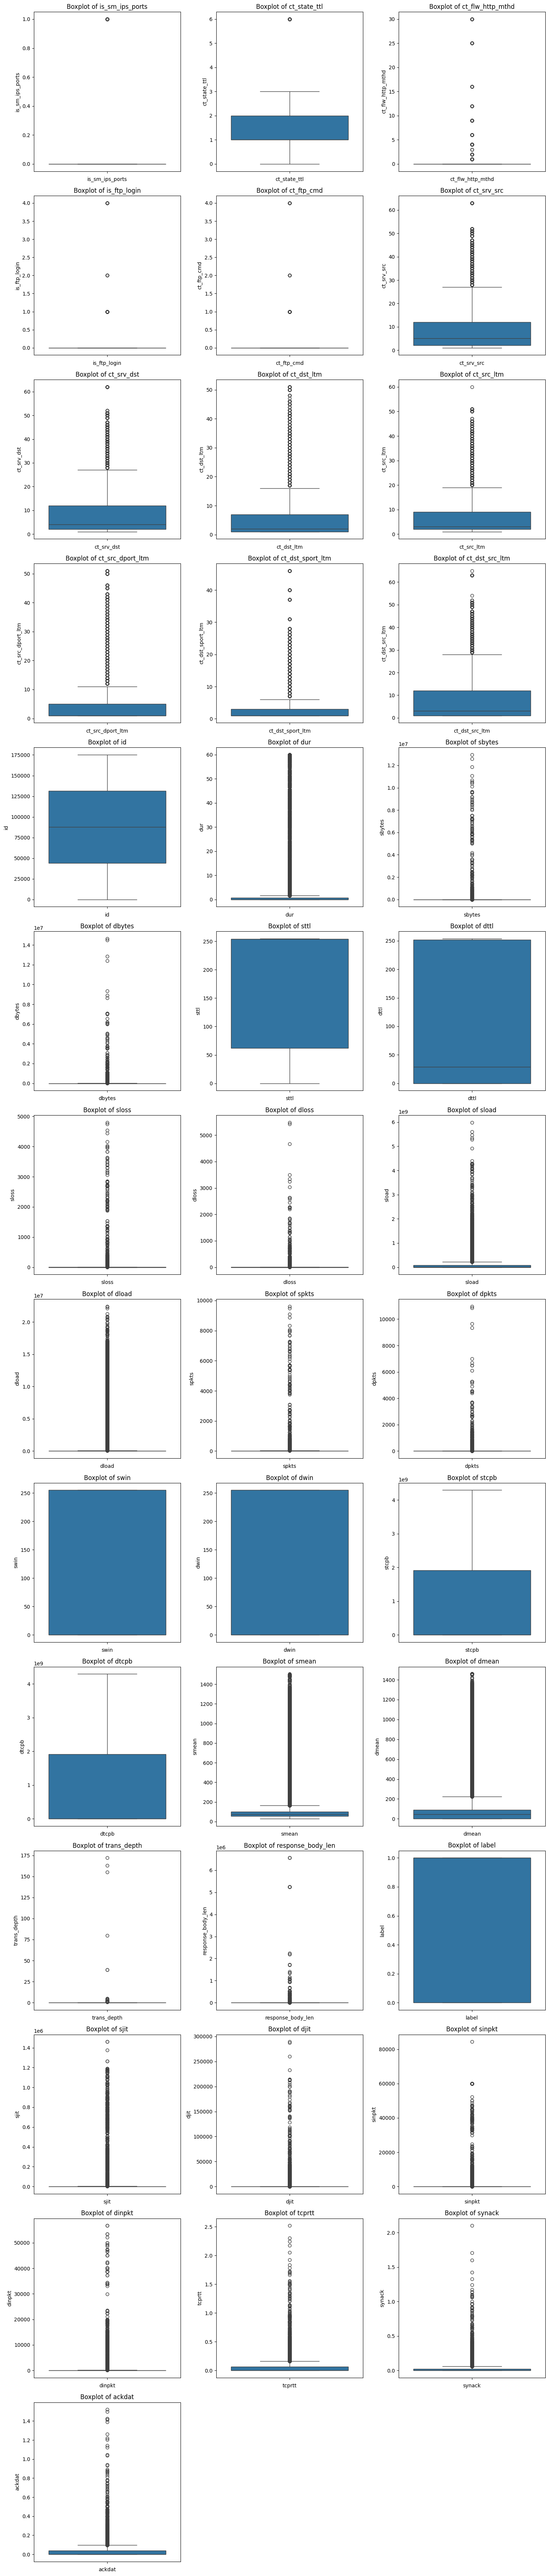

In [59]:
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_feats.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=numeric_feats[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [60]:
corr_matrix = numeric_feats.corr()

corr_matrix

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
is_sm_ips_ports           1.000000      0.093281         -0.024324   
ct_state_ttl              0.093281      1.000000         -0.097869   
ct_flw_http_mthd         -0.024324     -0.097869          1.000000   
is_ftp_login             -0.014965     -0.074930         -0.022901   
ct_ftp_cmd               -0.015072     -0.075633         -0.022825   
ct_srv_src               -0.088456      0.361170         -0.121654   
ct_srv_dst               -0.085440      0.364831         -0.119239   
ct_dst_ltm               -0.069404      0.302697         -0.087196   
ct_src_ltm               -0.079225      0.296982         -0.077356   
ct_src_dport_ltm         -0.057236      0.355013         -0.086710   
ct_dst_sport_ltm         -0.053460      0.393390         -0.087125   
ct_dst_src_ltm           -0.079550      0.428036         -0.107504   
id                        0.001393     -0.002462         -0.001730   
dur                       0.033159      0.188062          0.023578   
sbytes                   -0.006503     -0.010223         -0.002210   
dbytes                   -0.013628     -0.093752          0.055187   
sttl                     -0.221560      0.671069         -0.114292   
dttl                     -0.091135     -0.261688          0.226689   
sloss                    -0.009672     -0.036241         -0.001976   
dloss                    -0.017626     -0.122248          0.054380   
sload                    -0.049337      0.291700         -0.073819   
dload                    -0.035078     -0.373258         -0.039342   
spkts                    -0.018171     -0.086231          0.006787   
dpkts                    -0.022287     -0.151497          0.051339   
swin                     -0.115894     -0.557443          0.209071   
dwin                     -0.114967     -0.605304          0.209998   
stcpb                    -0.090698     -0.478150          0.165014   
dtcpb                    -0.090763     -0.477371          0.172655   
smean                    -0.056294     -0.068829          0.017566   
dmean                    -0.061122     -0.464543          0.130121   
trans_depth              -0.016644     -0.071958          0.221237   
response_body_len        -0.004955     -0.026142          0.067088   
label                    -0.184801      0.577193          0.015528   
sjit                     -0.014001     -0.038057          0.082934   
djit                     -0.018770     -0.113478          0.100159   
sinpkt                    0.941593      0.102219         -0.019179   
dinpkt                   -0.011204     -0.041936          0.047421   
tcprtt                   -0.065908     -0.110149          0.165381   
synack                   -0.061348     -0.100725          0.146846   
ackdat                   -0.063569     -0.106479          0.167564   

                   is_ftp_login  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
is_sm_ips_ports       -0.014965   -0.015072   -0.088456   -0.085440   
ct_state_ttl          -0.074930   -0.075633    0.361170    0.364831   
ct_flw_http_mthd      -0.022901   -0.022825   -0.121654   -0.119239   
is_ftp_login           1.000000    1.000000   -0.089651   -0.087794   
ct_ftp_cmd             1.000000    1.000000   -0.090000   -0.087999   
ct_srv_src            -0.089651   -0.090000    1.000000    0.980276   
ct_srv_dst            -0.087794   -0.087999    0.980276    1.000000   
ct_dst_ltm            -0.048383   -0.048734    0.841289    0.853150   
ct_src_ltm            -0.046755   -0.047360    0.780664    0.778210   
ct_src_dport_ltm      -0.063934   -0.064048    0.865623    0.868715   
ct_dst_sport_ltm      -0.065152   -0.065280    0.822883    0.830232   
ct_dst_src_ltm        -0.062992   -0.063029    0.966881    0.972186   
id                    -0.001380   -0.001294    0.000748   -0.000422   
dur                    0.019927    0.020908   -0.113574   -0.115411   
sbytes                -0.004481   -0.004513   -0.034231   -0.034776   
dbytes      

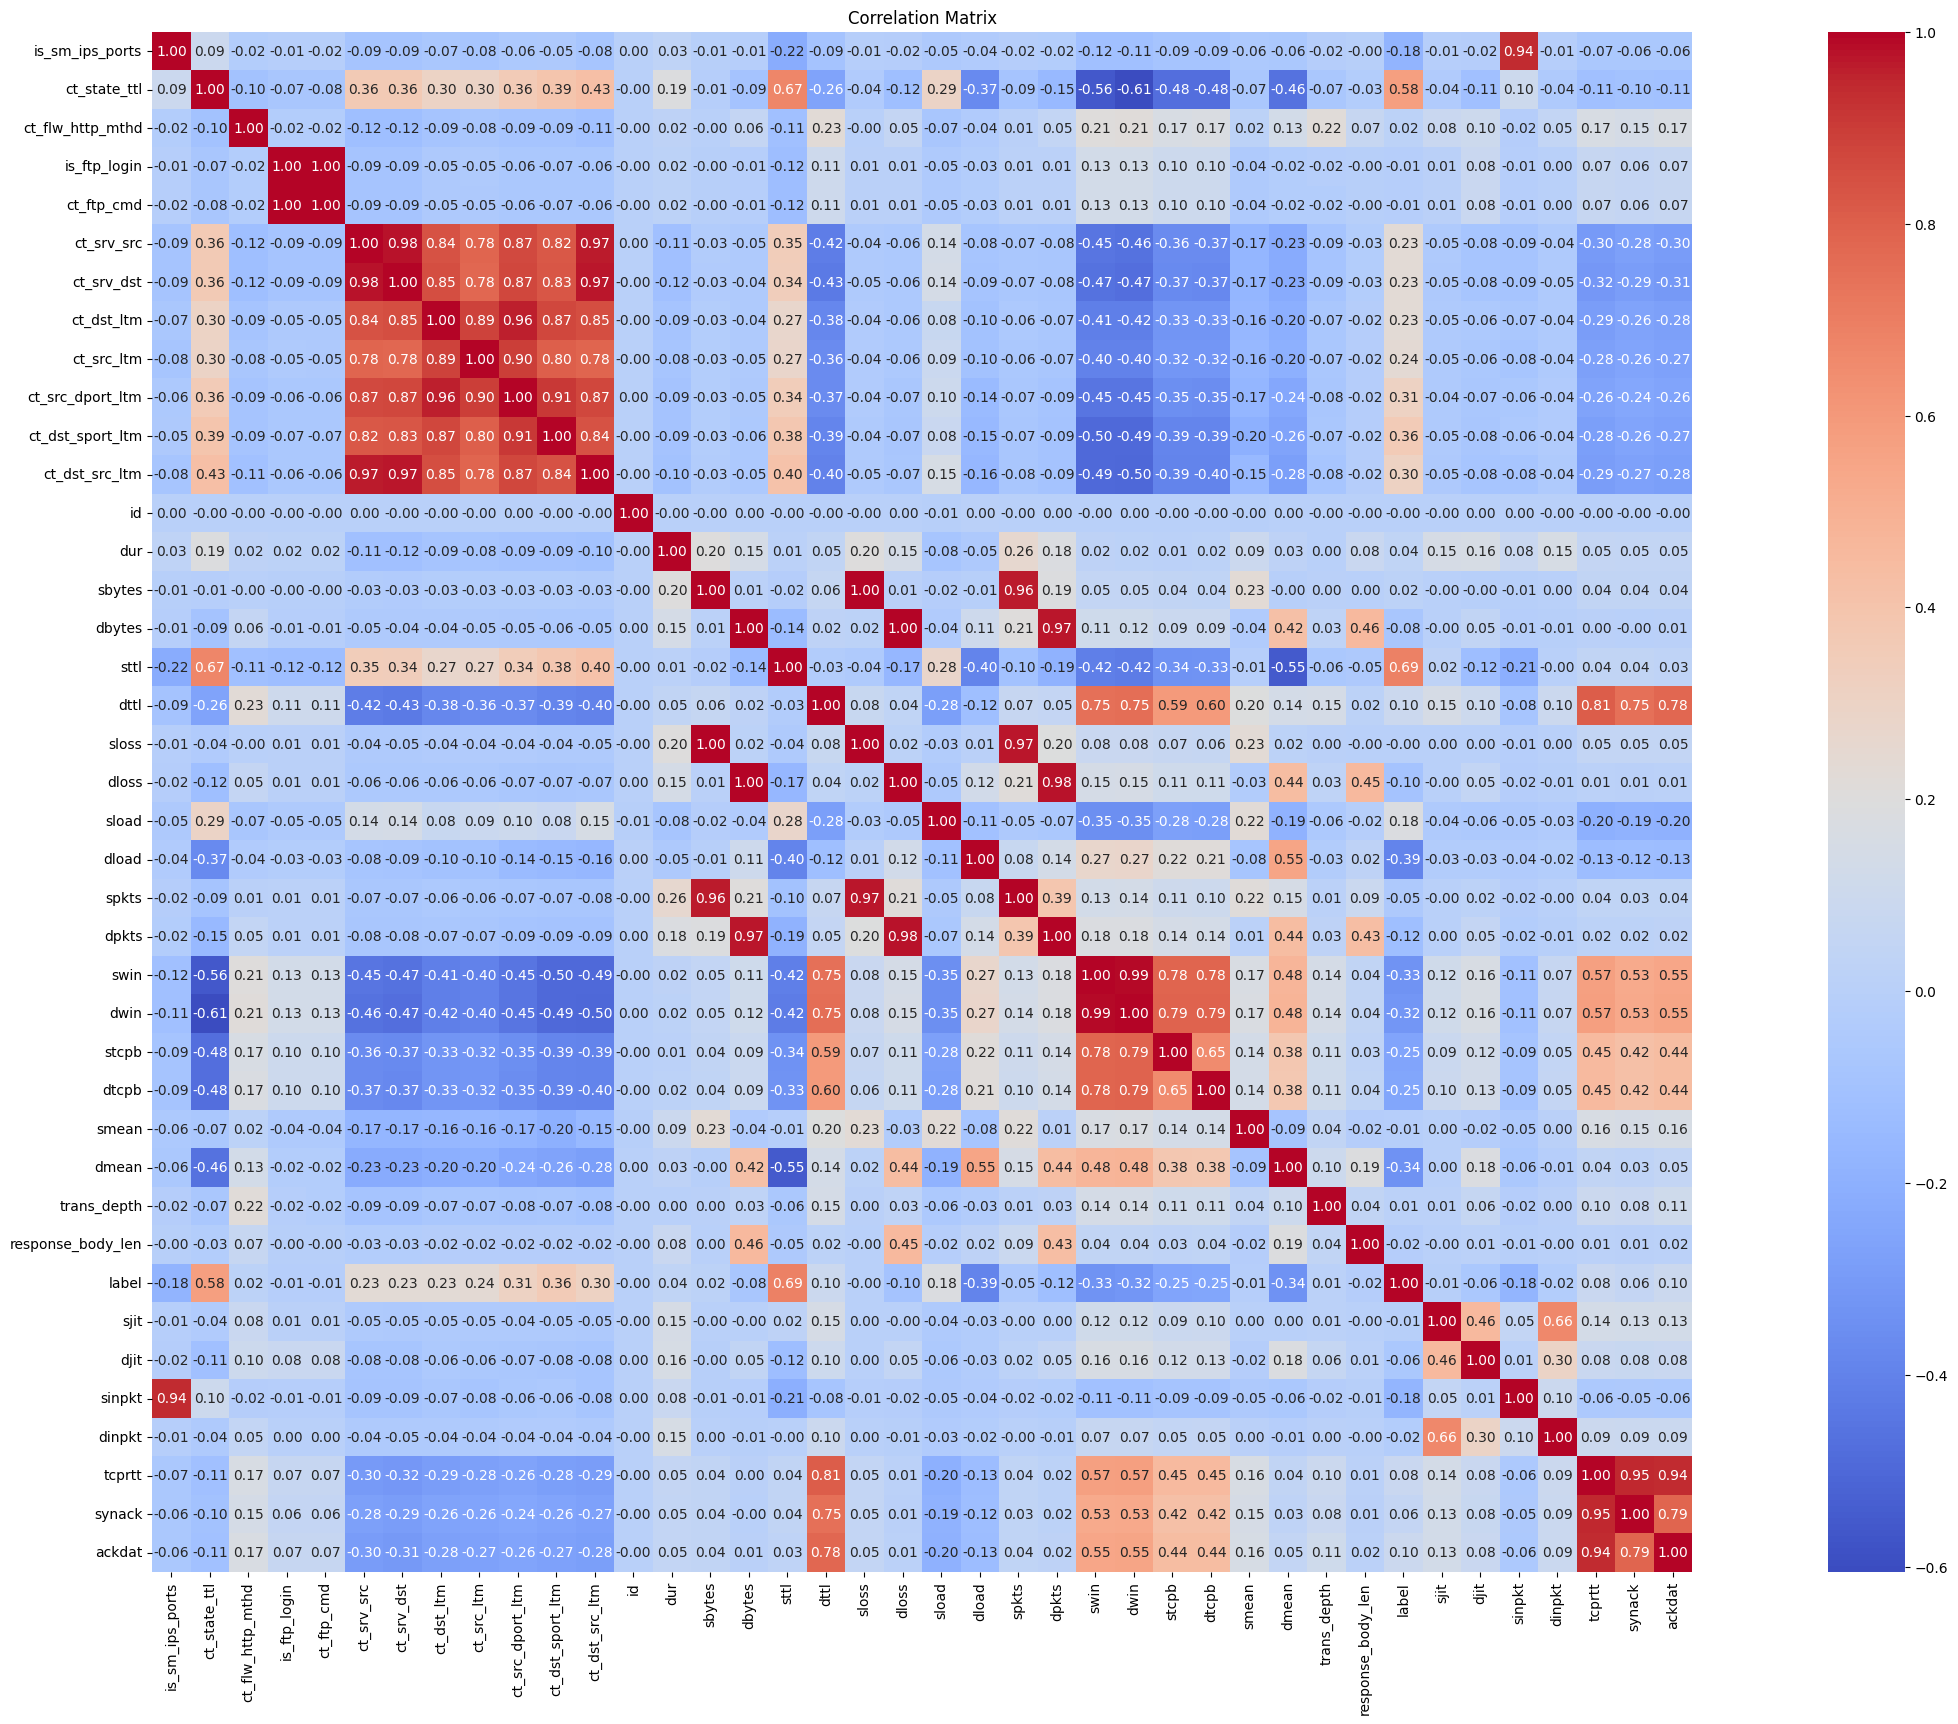

In [61]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [62]:
uniqes_object_counts = categorical_feats.nunique()

uniqes_object_counts

state           9
service        13
proto         133
attack_cat     10
dtype: int64

In [63]:
for col in categorical_feats.columns:
    print(df_train[col].value_counts())

state
INT    78148
FIN    73925
CON    12481
REQ     1889
RST       78
ECO       12
URN        1
PAR        1
no         1
Name: count, dtype: int64
service
-           89434
dns         44909
http        17784
smtp         4815
ftp-data     3795
ftp          3263
ssh          1242
pop3         1054
dhcp           93
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64
proto
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
visa         89
leaf-2       89
igmp         18
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


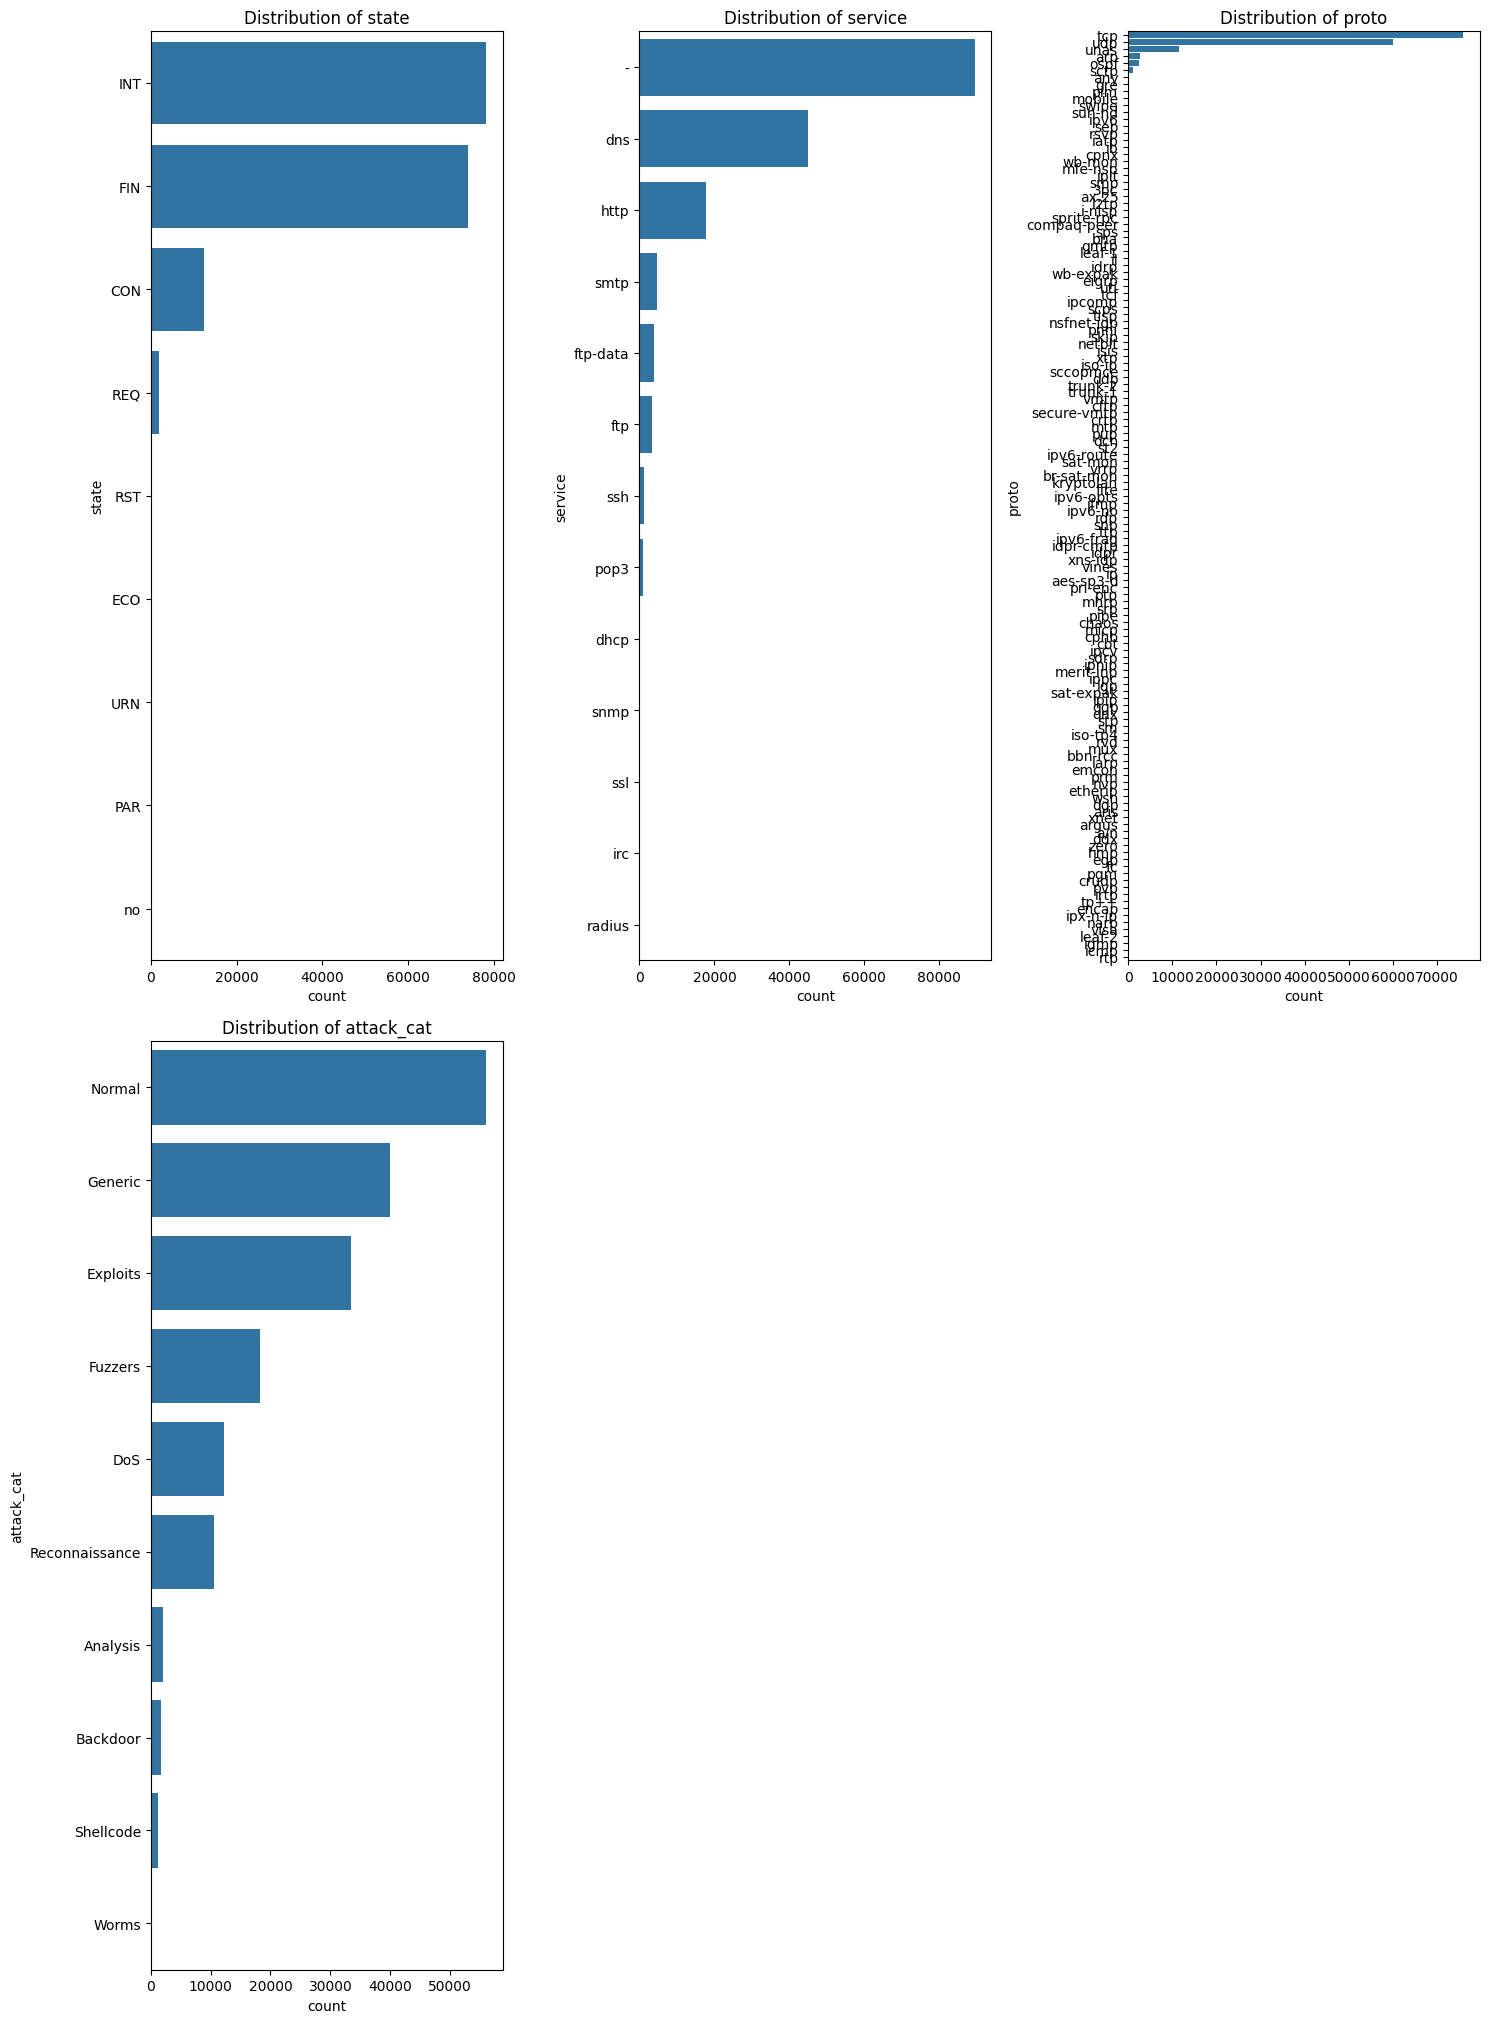

In [64]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(categorical_feats.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=categorical_feats[column], order=categorical_feats[column].value_counts().index)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

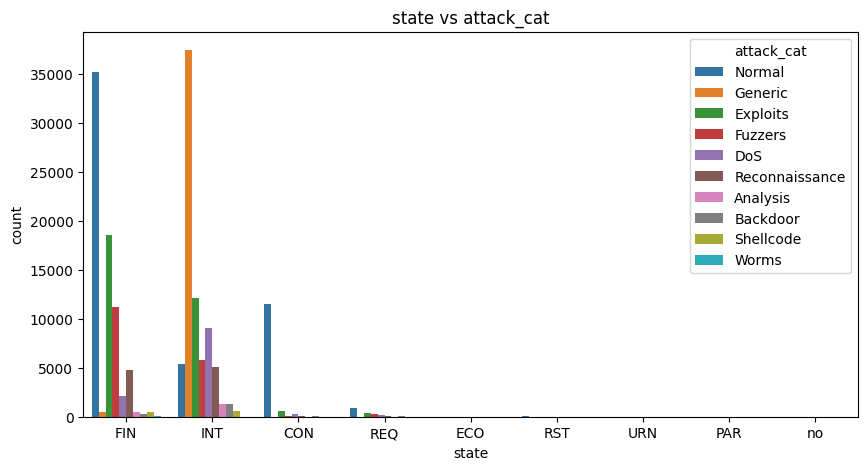

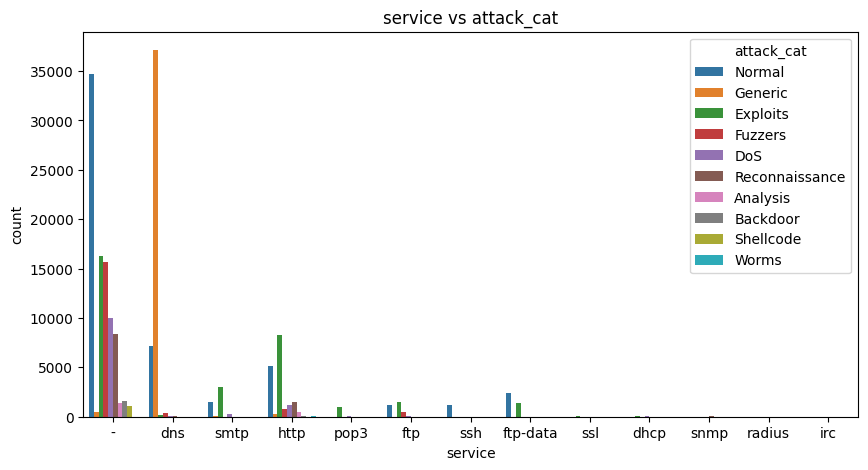

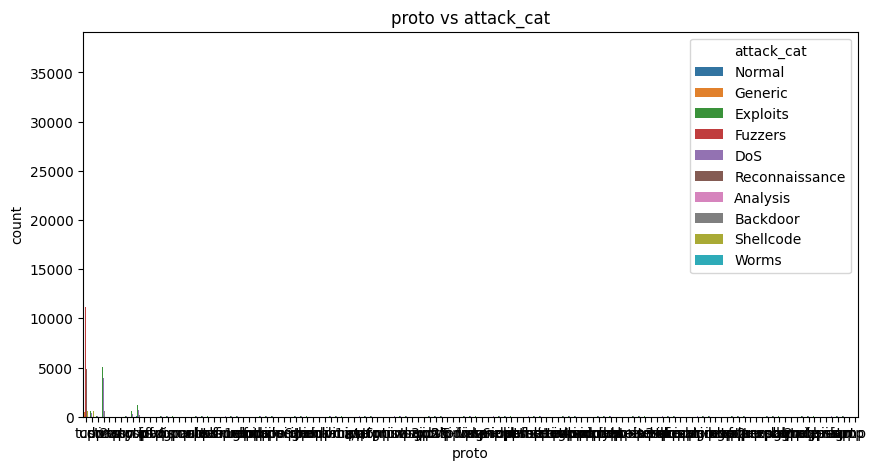

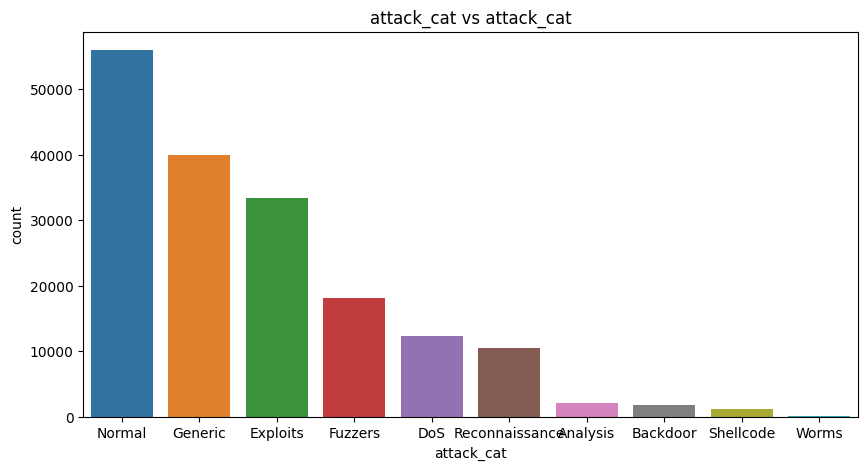

In [65]:
target_variable = 'attack_cat'

for col in categorical_feats.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue=target_variable, data=df_train)
    plt.title(f'{col} vs {target_variable}')
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [66]:
df_train = df_train.drop(['label'], axis=1)

In [67]:
df_train['is_ftp_login'] = np.where(df_train['is_ftp_login'] == 0, 'false', 'true')

In [68]:
df_train['is_sm_ips_ports'] = df_train['is_sm_ips_ports'].replace({0: 'false', 1:'true'})

In [69]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(df_train, test_size = 0.2,random_state = 0) # random_state=42 optional

In [70]:
X_train = train_set.drop("attack_cat", axis = 1)
y_train = train_set["attack_cat"]
X_val = val_set.drop("attack_cat", axis = 1)
y_val = val_set["attack_cat"]

In [71]:
numeric_feats = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_feats = X_train.select_dtypes(include='object').columns.tolist()

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [74]:
df_train.isnull().sum().sum()

350707

In [75]:
df_train['is_sm_ips_ports'].value_counts()

is_sm_ips_ports
false    163963
true       2632
Name: count, dtype: int64

In [76]:
df_train['ct_state_ttl'].value_counts()

ct_state_ttl
2.0    77981
1.0    46914
0.0    38821
6.0     1838
3.0     1152
Name: count, dtype: int64

In [77]:
df_train['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     149698
1.0      15920
4.0        793
9.0         85
2.0         71
6.0         36
30.0        26
25.0        24
12.0        22
16.0        16
3.0          3
Name: count, dtype: int64

In [78]:
df_train.ct_flw_http_mthd.fillna(value=0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
175336    0.0
175337    0.0
175338    0.0
175339    0.0
175340    0.0
Name: ct_flw_http_mthd, Length: 175341, dtype: float64

In [79]:
df_train['is_ftp_login'].value_counts()

is_ftp_login
false    164251
true      11090
Name: count, dtype: int64

In [81]:
df_train['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [82]:
df_train['proto'].value_counts()

proto
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
visa         89
leaf-2       89
igmp         18
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64

In [83]:
df_train['ct_ftp_cmd'].unique()

array([ 0., nan,  1.,  2.,  4.])

In [84]:
df_train['sbytes'].fillna(df_train['sbytes'].mean(), inplace=True)
df_train['dbytes'].fillna(df_train['dbytes'].median(), inplace=True)

In [85]:
df_train.isnull().sum()

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login            0
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes                  0
dbytes                  0
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
sjit                 8738
djit                 8846
sinpkt      

In [88]:
from sklearn.impute import SimpleImputer, KNNImputer

class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', fill_value=None, n_neighbors=5):
        self.strategy = strategy
        self.fill_value = fill_value
        self.n_neighbors = n_neighbors
        self.imputer_numeric = None
        self.imputer_categorical = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Handle numeric features
        if self.strategy in ['mean', 'median', 'mode', 'constant']:
            self.imputer_numeric = SimpleImputer(strategy=self.strategy, fill_value=self.fill_value)
            self.imputer_numeric.fit(X.select_dtypes(include=np.number))

        # Handle categorical features
        if self.strategy in ['mode', 'constant']:
            self.imputer_categorical = SimpleImputer(strategy='most_frequent' if self.strategy == 'mode' else 'constant', fill_value=self.fill_value)
            self.imputer_categorical.fit(X.select_dtypes(include='object'))

        return self

    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        X_transformed = X.copy()

        # Impute numeric features
        if self.imputer_numeric is not None:
            numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
            X_transformed[numeric_feats] = self.imputer_numeric.transform(X[numeric_feats])

        # Impute categorical features
        if self.imputer_categorical is not None:
            categorical_feats = X.select_dtypes(include='object').columns.tolist()
            X_transformed[categorical_feats] = self.imputer_categorical.transform(X[categorical_feats])

        return X_transformed

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
normal_features = []
non_normal_features = []

skewness_threshold = 0.5 
kurtosis_threshold = 3.0

for column in numeric_feats.columns:
    skewness = numeric_feats[column].skew()
    kurtosis = numeric_feats[column].kurt()
    
    if abs(skewness) < skewness_threshold and abs(kurtosis - 3) < kurtosis_threshold:
        normal_features.append(column)
    else:
        non_normal_features.append(column)

In [ ]:
print("Normally Distributed Features:", normal_features)
print("Non-Normally Distributed Features:", non_normal_features)

Normally Distributed Features: []
Non-Normally Distributed Features: ['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']


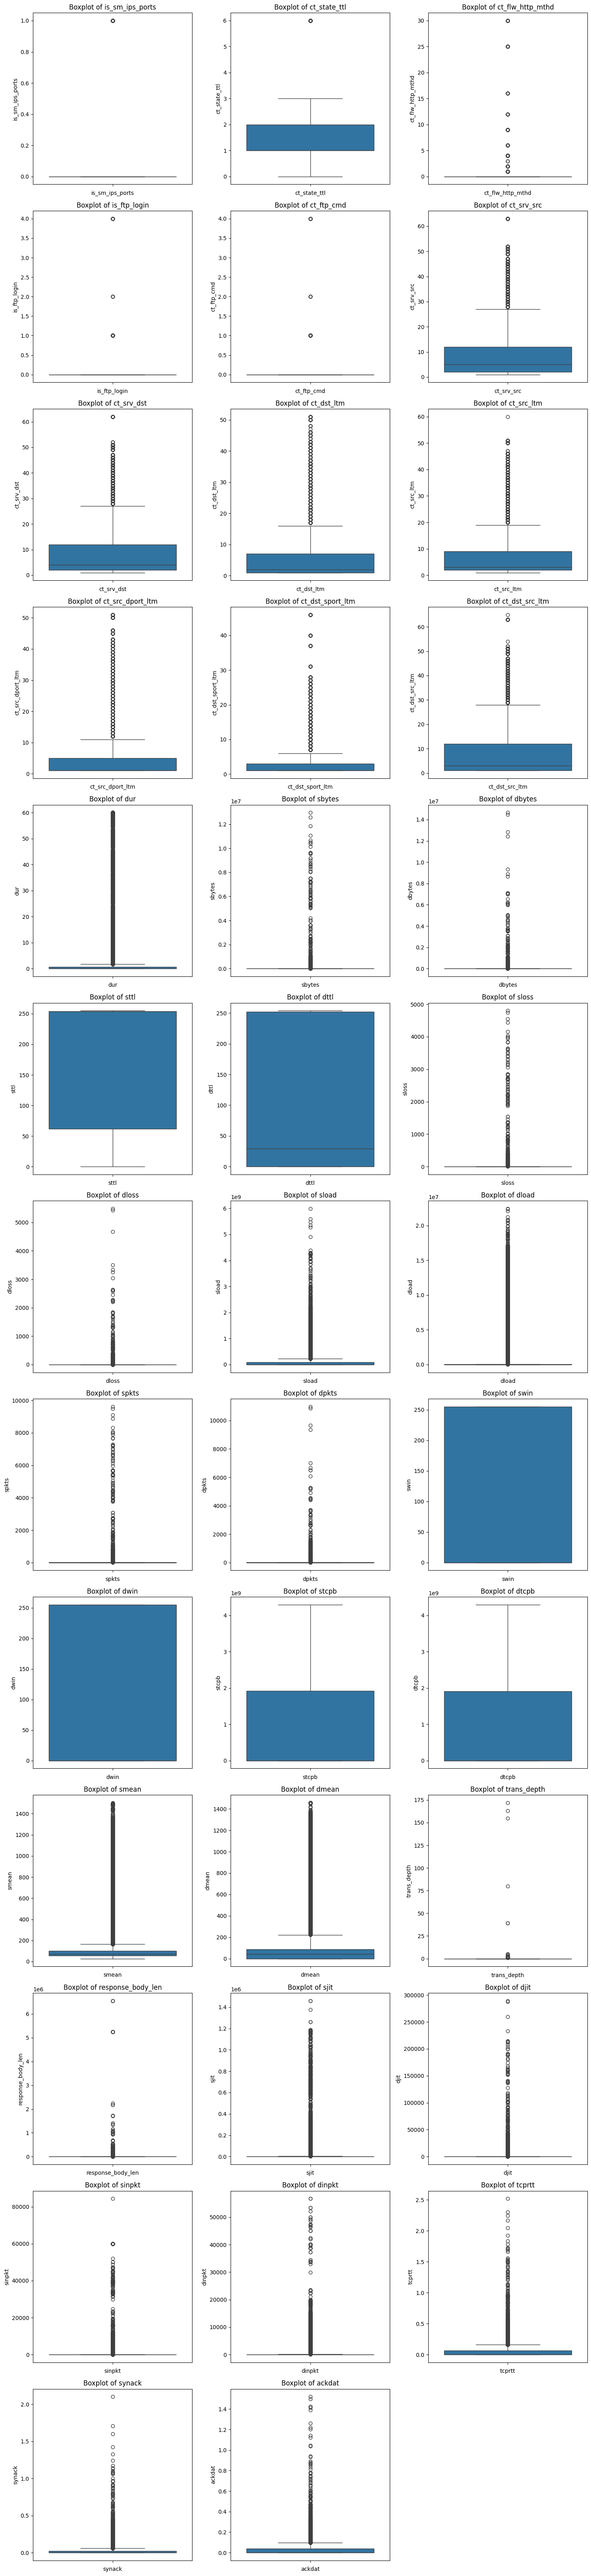

In [ ]:
num_features = numeric_feats.shape[1]

num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_feats.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=numeric_feats[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
def outlier_summary(dataframe):
    outlier_counts = {}
    total_counts = {}

    overall_outlier_count = 0
    overall_total_count = 0

    for column in dataframe.select_dtypes(include='number').columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = (dataframe[column] < lower_bound).sum() + (dataframe[column] > upper_bound).sum()
        outlier_counts[column] = outlier_count

        total_count = dataframe[column].count()
        total_counts[column] = total_count

        overall_outlier_count += outlier_count
        overall_total_count += total_count

    summary = []
    for feature in dataframe.select_dtypes(include='number').columns:
        count = outlier_counts[feature]
        total = total_counts[feature]
        if total > 0:
            percentage_outliers = (count / total) * 100
        else:
            percentage_outliers = 0

        summary.append({'Feature': feature, 'Outliers Count': count, 'Percentage of Outliers': f"{percentage_outliers:.2f}%"})

    if overall_total_count > 0:
        overall_percentage_outliers = (overall_outlier_count / overall_total_count) * 100
    else:
        overall_percentage_outliers = 0

    summary.append({'Feature': 'Overall', 
                    'Outliers Count': overall_outlier_count, 
                    'Percentage of Outliers': f"{overall_percentage_outliers:.2f}%"})

    return pd.DataFrame(summary)

In [ ]:
outlier_summary_df = outlier_summary(numeric_feats)
print(outlier_summary_df)

              Feature  Outliers Count Percentage of Outliers
0     is_sm_ips_ports            2632                  1.58%
1        ct_state_ttl            1838                  1.10%
2    ct_flw_http_mthd           16996                 10.20%
3        is_ftp_login            2443                  1.47%
4          ct_ftp_cmd            2443                  1.47%
5          ct_srv_src           18379                 11.04%
6          ct_srv_dst           18380                 11.03%
7          ct_dst_ltm           21021                 12.62%
8          ct_src_ltm           12487                  7.50%
9    ct_src_dport_ltm           31801                 19.09%
10   ct_dst_sport_ltm           35385                 21.25%
11     ct_dst_src_ltm           16832                 10.11%
12                dur           14968                  8.98%
13             sbytes           21760                 13.05%
14             dbytes           26698                 16.04%
15               sttl   

In [ ]:
for column in numeric_feats.columns:
     numeric_feats[column] = np.log1p(numeric_feats[column])

In [ ]:
outlier_summary_df = outlier_summary(numeric_feats)
print(outlier_summary_df)

              Feature  Outliers Count Percentage of Outliers
0     is_sm_ips_ports            2632                  1.58%
1        ct_state_ttl           40659                 24.39%
2    ct_flw_http_mthd           16996                 10.20%
3        is_ftp_login            2443                  1.47%
4          ct_ftp_cmd            2443                  1.47%
5          ct_srv_src               0                  0.00%
6          ct_srv_dst               0                  0.00%
7          ct_dst_ltm               0                  0.00%
8          ct_src_ltm               1                  0.00%
9    ct_src_dport_ltm            5515                  3.31%
10   ct_dst_sport_ltm           29862                 17.93%
11     ct_dst_src_ltm               0                  0.00%
12                dur            9664                  5.80%
13             sbytes            2745                  1.65%
14             dbytes               0                  0.00%
15               sttl   

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
df_train.drop_duplicates(inplace=True)

df_train

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
0                   0.0      0.000000               0.0           0.0   
1                   0.0      2.000000               0.0           0.0   
2                   0.0      1.303852               0.0           0.0   
3                   0.0      0.000000               0.0           0.0   
4                   0.0      0.000000               0.0           0.0   
...                 ...           ...               ...           ...   
175336              0.0      2.000000               0.0           0.0   
175337              0.0      1.000000               0.0           1.0   
175338              0.0      2.000000               0.0           0.0   
175339              0.0      2.000000               0.0           0.0   
175340              0.0      2.000000               0.0           0.0   

        ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
0              0.0        11.0    9.104384    5.000000     4.00000   
1              0.0        10.0   10.000000   10.000000    10.00000   
2              0.0         4.0    4.000000    2.000000     2.00000   
3              0.0         9.0    9.000000    3.000000     2.00000   
4              0.0         3.0    3.000000    4.000000     3.00000   
...            ...         ...         ...         ...         ...   
175336         0.0        38.0   38.000000   32.000000     6.95245   
175337         1.0         1.0    1.000000    2.000000     3.00000   
175338         0.0        33.0   33.000000   16.000000    16.00000   
175339         0.0        36.0   36.000000    6.191773    37.00000   
175340         0.0        24.0   24.000000   16.000000    16.00000   

        ct_src_dport_ltm  ...  response_body_len  proto attack_cat  \
0               2.000000  ...           0.000000    tcp     Normal   
1               5.388116  ...           0.000000    udp    Generic   
2               1.000000  ...           0.000000    tcp   Exploits   
3               2.000000  ...           0.000000    tcp     Normal   
4               1.000000  ...           0.000000    udp     Normal   
...                  ...  ...                ...    ...        ...   
175336         32.000000  ...           0.000000    udp    Generic   
175337          5.388116  ...        2157.132771    tcp   Exploits   
175338         16.000000  ...           0.000000    udp    Generic   
175339         36.000000  ...           0.000000    udp    Generic   
175340         16.000000  ...        2157.132771    udp    Generic   

                sjit         djit      sinpkt      dinpkt    tcprtt    synack  \
0        4449.110313  3234.831566   11.845558    6.261361  0.041331  0.000444   
1           0.000000     0.000000    0.009000    0.000000  0.000000  0.000000   
2        8561.040438   249.950547  165.386453  172.345750  0.158826  0.057902   
3        4053.086020  2918.730804    8.669644    4.496707  0.000558  0.000448   
4           0.000000     0.000000    0.008000    0.007000  0.000000  0.000000   
...              ...          ...         ...         ...       ...       ...   
175336      0.000000     0.000000    0.005000    0.000000  0.000000  0.000000   
175337  15464.286700   531.848125  193.445428  209.600766  0.066524  0.047738   
175338      0.000000     0.000000    0.008000    0.000000  0.000000  0.000000   
175339      0.000000     0.000000    0.004000    0.000000  0.000000  0.000000   
175340      0.000000     0.000000    0.009000    0.000000  0.000000  0.000000   

          ackdat  
0       0.000114  
1       0.020402  
2       0.100924  
3       0.020402  
4       0.000000  
...          ...  
175336  0.000000  
175337  0.018786  
175338  0.000000  
175339  0.020402  
175340  0.000000  

[168518 rows x 42 columns]

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### Feature Selection

In [ ]:
numerical_features = numeric_feats.columns
categorical_features = categorical_feats.columns

In [ ]:
corr_matrix = numeric_feats.corr()

corr_matrix

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
is_sm_ips_ports           1.000000      0.100520         -0.039907   
ct_state_ttl              0.100520      1.000000         -0.133937   
ct_flw_http_mthd         -0.039907     -0.133937          1.000000   
is_ftp_login             -0.015324     -0.072161         -0.038006   
ct_ftp_cmd               -0.015392     -0.072381         -0.038122   
ct_srv_src               -0.113008      0.321842         -0.277523   
ct_srv_dst               -0.104821      0.318458         -0.274708   
ct_dst_ltm               -0.075926      0.250721         -0.188677   
ct_src_ltm               -0.093771      0.255427         -0.181572   
ct_src_dport_ltm         -0.047221      0.451587         -0.179809   
ct_dst_sport_ltm         -0.033460      0.488021         -0.173422   
ct_dst_src_ltm           -0.092987      0.470410         -0.238152   
dur                      -0.025028     -0.035247          0.151906   
sbytes                   -0.183443     -0.498498          0.192664   
dbytes                   -0.122744     -0.805809          0.302137   
sttl                     -0.553601      0.623018         -0.093098   
dttl                     -0.124786     -0.574200          0.349211   
sloss                    -0.096977     -0.549696          0.167575   
dloss                    -0.086112     -0.611923          0.176857   
sload                    -0.374114      0.388554         -0.285446   
dload                    -0.122535     -0.894800          0.236605   
spkts                    -0.145063     -0.571924          0.179911   
dpkts                    -0.113868     -0.748499          0.246493   
swin                     -0.115898     -0.547480          0.342173   
dwin                     -0.114969     -0.573904          0.344957   
stcpb                    -0.114663     -0.572566          0.344863   
dtcpb                    -0.114793     -0.573489          0.344325   
smean                    -0.118512     -0.094154          0.088233   
dmean                    -0.125953     -0.823726          0.326961   
trans_depth              -0.042384     -0.149262          0.923152   
response_body_len        -0.031736     -0.170021          0.693999   
sjit                     -0.082615     -0.354930          0.378596   
djit                     -0.100881     -0.454224          0.408865   
sinpkt                    0.427187     -0.109624          0.284379   
dinpkt                   -0.094747     -0.294168          0.377231   
tcprtt                   -0.069713     -0.023589          0.255061   
synack                   -0.064753     -0.020378          0.223935   
ackdat                   -0.066950     -0.020112          0.256736   

                   is_ftp_login  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
is_sm_ips_ports       -0.015324   -0.015392   -0.113008   -0.104821   
ct_state_ttl          -0.072161   -0.072381    0.321842    0.318458   
ct_flw_http_mthd      -0.038006   -0.038122   -0.277523   -0.274708   
is_ftp_login           1.000000    1.000000   -0.140254   -0.134344   
ct_ftp_cmd             1.000000    1.000000   -0.140354   -0.134417   
ct_srv_src            -0.140254   -0.140354    1.000000    0.942629   
ct_srv_dst            -0.134344   -0.134417    0.942629    1.000000   
ct_dst_ltm            -0.040694   -0.041257    0.804700    0.837696   
ct_src_ltm            -0.042688   -0.043307    0.761150    0.753711   
ct_src_dport_ltm      -0.084821   -0.084789    0.841659    0.847230   
ct_dst_sport_ltm      -0.076879   -0.076886    0.787815    0.800155   
ct_dst_src_ltm        -0.058480   -0.058505    0.900647    0.915599   
dur                    0.131157    0.131942   -0.350865   -0.361431   
sbytes                 0.080392    0.080102   -0.446060   -0.460745   
dbytes                 0.115030    0.115141   -0.477904   -0.490708   
sttl                  -0.083706   -0.083073    0.304277    0.284725   
dttl                   0.122698    0.122627   -0.553886   -0.578567   
sloss     

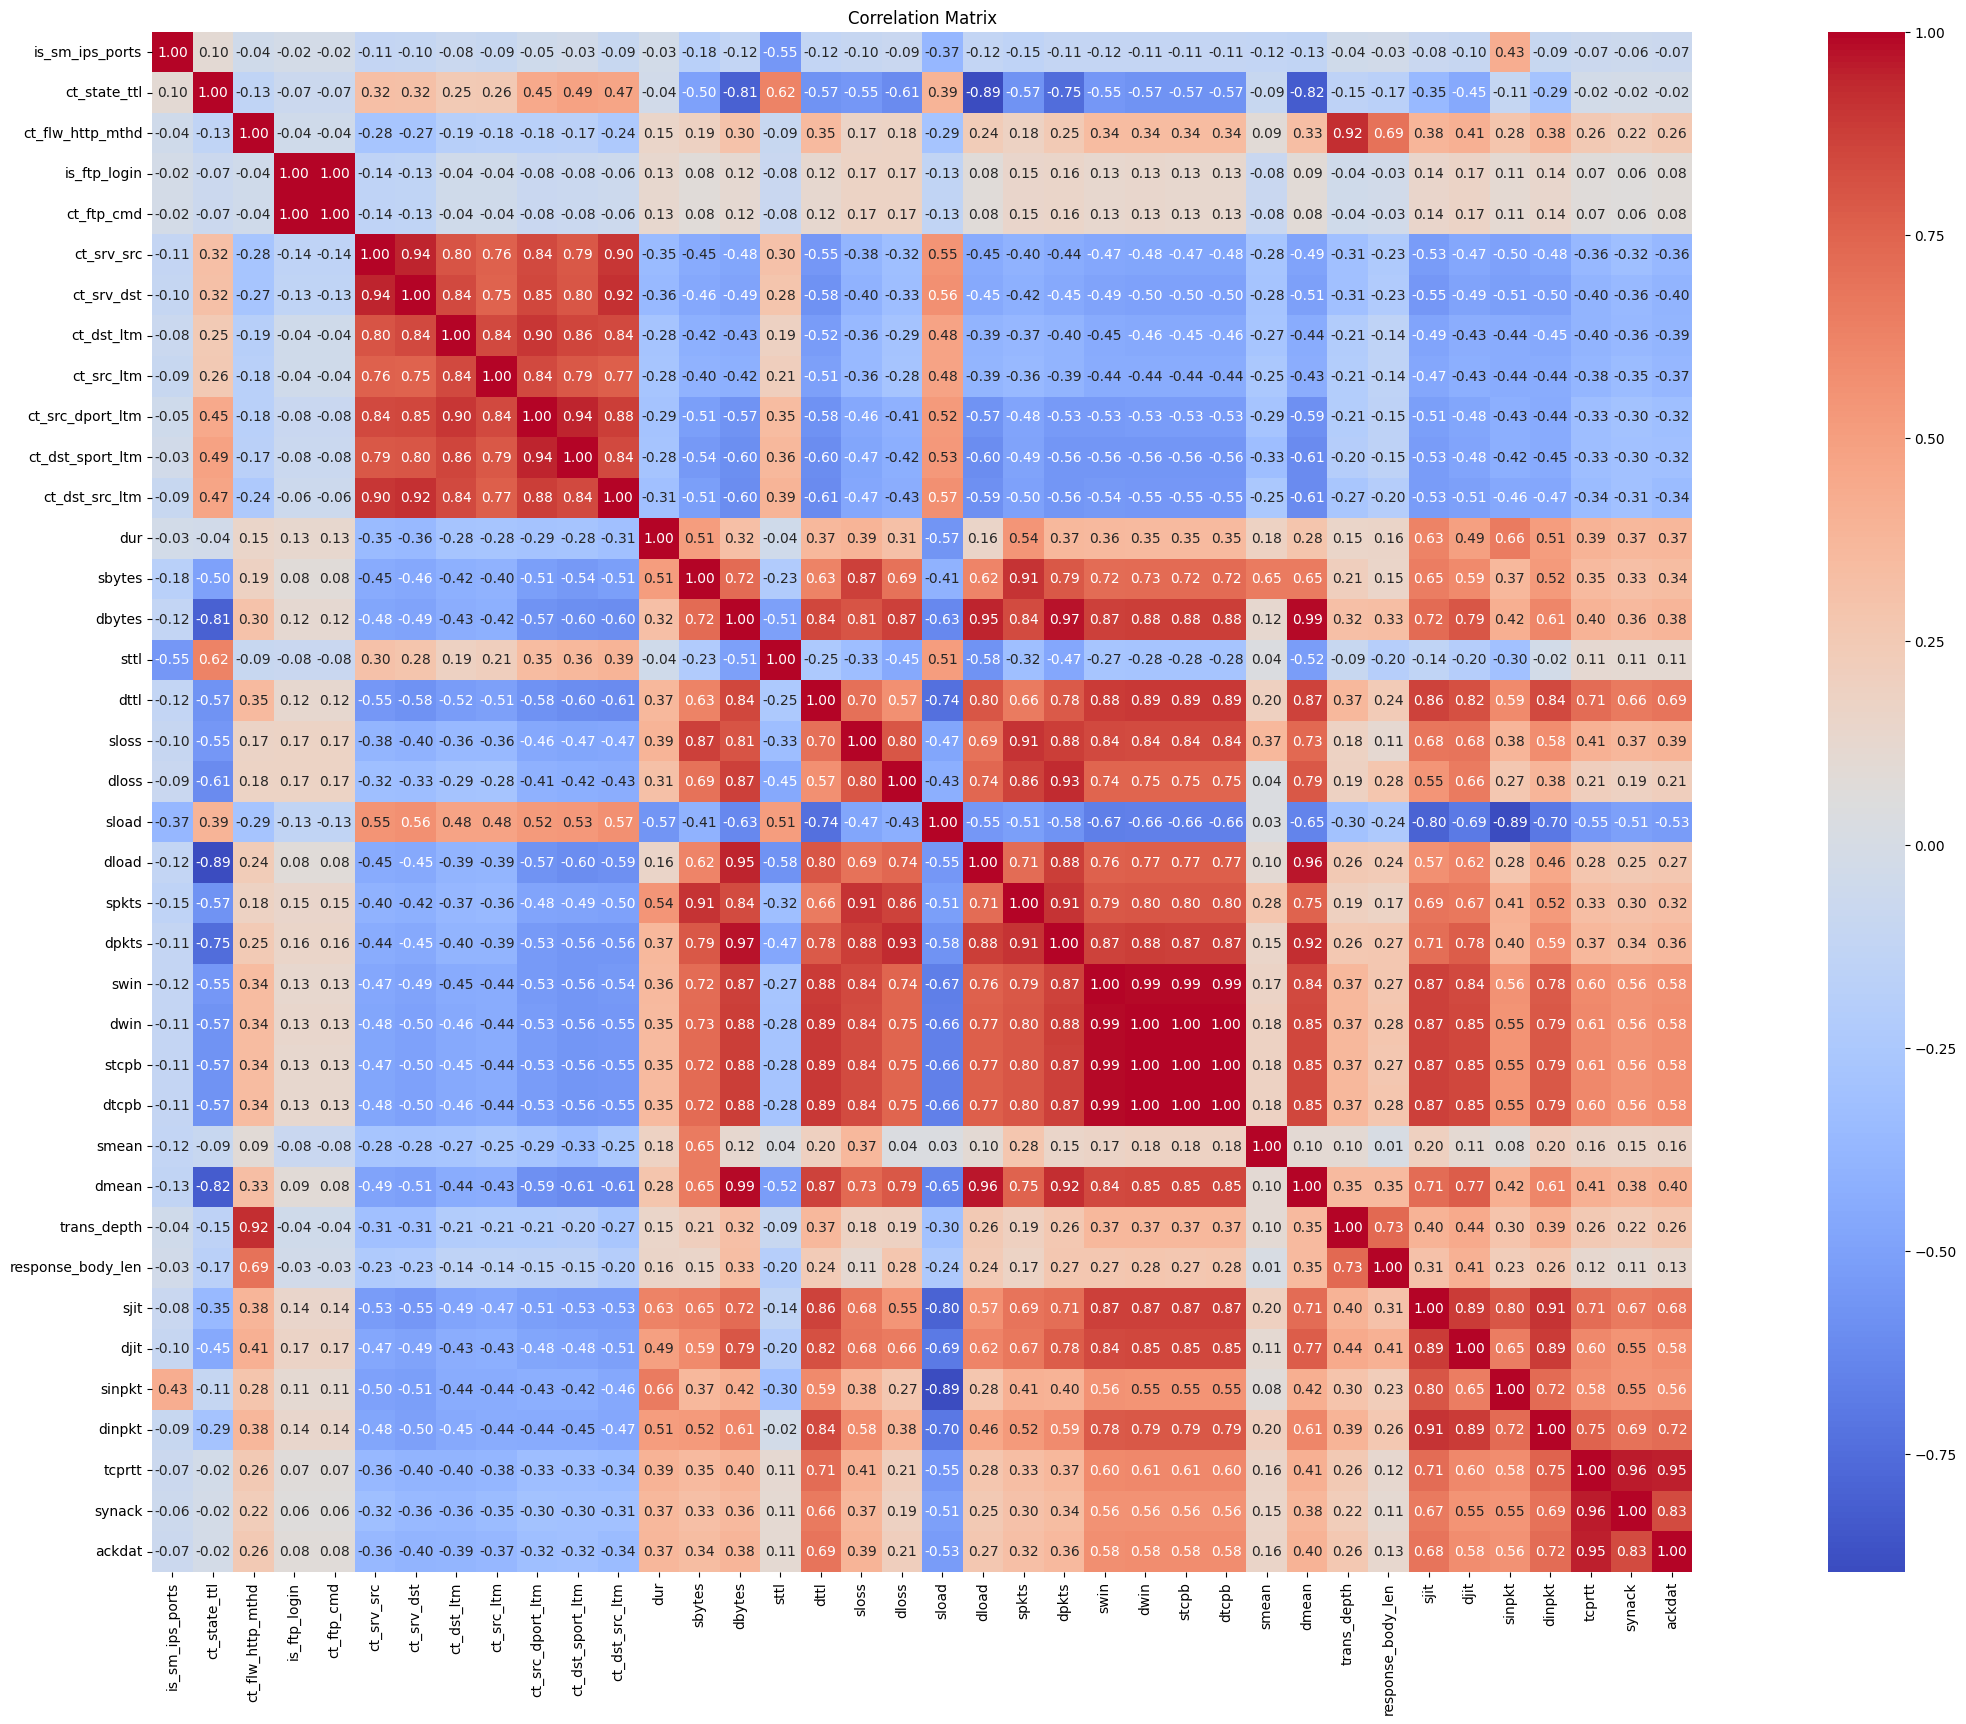

In [ ]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
limit = 0.9

columns = corr_matrix.columns
correlation_pairs = []

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i, j] >= limit:
            correlation_pairs.append((columns[i], columns[j], corr_matrix.iloc[i, j]))

correlation_pairs.sort(key=lambda x: x[2], reverse=True)

In [ ]:
print("High correlated features:")

for col1, col2, corr_value in correlation_pairs:
    print(f"{col1:20s} {col2:20s} {corr_value:.4f}")

High correlated features:
is_ftp_login         ct_ftp_cmd           1.0000
dwin                 dtcpb                0.9980
dwin                 stcpb                0.9979
stcpb                dtcpb                0.9963
swin                 dwin                 0.9901
swin                 dtcpb                0.9883
swin                 stcpb                0.9883
dbytes               dmean                0.9854
dbytes               dpkts                0.9725
dload                dmean                0.9636
tcprtt               synack               0.9587
tcprtt               ackdat               0.9534
dbytes               dload                0.9450
ct_src_dport_ltm     ct_dst_sport_ltm     0.9440
ct_srv_src           ct_srv_dst           0.9426
dloss                dpkts                0.9294
ct_flw_http_mthd     trans_depth          0.9232
dpkts                dmean                0.9192
ct_srv_dst           ct_dst_src_ltm       0.9156
sjit                 dinpkt               0

In [ ]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table, correction=False)[0]
    n = contingency_table.sum().sum()
    minimum_dimension = min(contingency_table.shape) - 1 
    return np.sqrt((chi2 / n) / minimum_dimension)

In [ ]:
cramer_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        if i != j:
            cramer_v_matrix.iloc[i, j] = cramers_v(categorical_feats[categorical_features[i]], categorical_feats[categorical_features[j]])
        else:
            cramer_v_matrix.iloc[i, j] = 1.0

print(cramer_v_matrix)

               state   service     proto attack_cat
state            1.0  0.242227  0.555675   0.259933
service     0.242227       1.0  0.264079   0.323404
proto       0.555675  0.264079       1.0   0.318897
attack_cat  0.259933  0.323404  0.318897        1.0


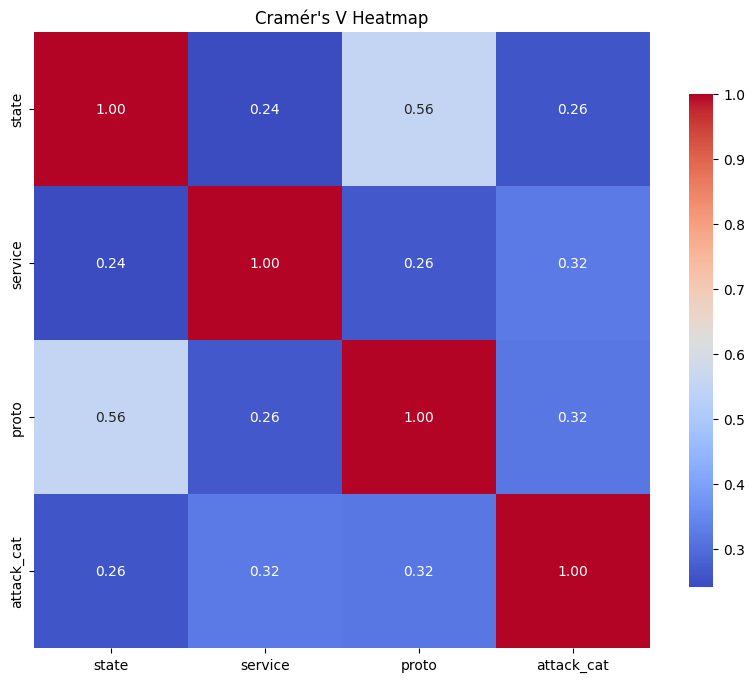

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_v_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Heatmap")
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_feats

state service proto attack_cat
0        FIN       -   tcp     Normal
1        INT     dns   udp    Generic
2        FIN       -   tcp   Exploits
3        FIN       -   tcp     Normal
4        CON     dns   udp     Normal
...      ...     ...   ...        ...
175336   INT     dns   udp    Generic
175337   FIN     ftp   tcp   Exploits
175338   INT     dns   udp    Generic
175339   INT     dns   udp    Generic
175340   INT     dns   udp    Generic

[175341 rows x 4 columns]

In [ ]:
# Define the categorical columns
categorical_columns = ['state', 'service', 'proto']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(df_train[categorical_columns], drop_first=True)

# Encode the target variable if it contains string labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_train['attack_cat'])

# Perform Chi-Square test
chi2_stat, p_values = chi2(X_encoded, y_encoded)

# Create a DataFrame to display the results
chi2_results_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Stat': chi2_stat,
    'P-Value': p_values
})

# Sort the results by P-Value
chi2_results_df = chi2_results_df.sort_values(by='P-Value')

print("\nChi-Square Test Results:")
print(chi2_results_df)



Chi-Square Test Results:
              Feature     Chi2 Stat   P-Value
11   service_ftp-data   3436.269512  0.000000
14       service_pop3   3841.113365  0.000000
12       service_http  12350.980908  0.000000
18        service_ssh   2453.702930  0.000000
10        service_ftp   2507.930720  0.000000
..                ...           ...       ...
15     service_radius      8.498151  0.484825
7            state_no      2.027143  0.991031
6           state_URN      2.027143  0.991031
110         proto_rtp      2.027143  0.991031
3           state_PAR      2.027143  0.991031

[152 rows x 3 columns]


In [ ]:
significant_features = chi2_results_df[chi2_results_df['P-Value'] < 0.05]['Feature'].values

print("\nSignificant Features based on Chi-Square Test:")
print(significant_features)


Significant Features based on Chi-Square Test:
['service_ftp-data' 'service_pop3' 'service_http' 'service_ssh'
 'service_ftp' 'service_dns' 'proto_unas' 'proto_sctp' 'proto_ospf'
 'proto_tcp' 'proto_udp' 'state_INT' 'state_FIN' 'proto_arp'
 'service_smtp' 'state_REQ' 'service_snmp' 'proto_any' 'service_irc'
 'proto_gre' 'proto_rsvp' 'proto_sun-nd' 'proto_swipe' 'proto_mobile'
 'proto_ipv6' 'proto_pim' 'proto_sep' 'proto_crtp' 'proto_pri-enc'
 'service_dhcp' 'proto_iatp' 'proto_sat-mon' 'proto_zero' 'proto_ipcv'
 'proto_ttp' 'proto_wsn' 'proto_cftp' 'proto_fc' 'proto_bna' 'proto_cphb'
 'proto_i-nlsp' 'proto_vrrp' 'proto_pgm' 'proto_iplt' 'proto_xnet'
 'proto_ddp' 'proto_cpnx' 'proto_ifmp' 'proto_isis' 'proto_bbn-rcc'
 'proto_srp' 'proto_secure-vmtp' 'proto_pipe' 'proto_tlsp' 'proto_pnni'
 'proto_merit-inp' 'proto_rvd' 'proto_sccopmce' 'proto_sps' 'proto_micp'
 'proto_vines' 'proto_wb-mon' 'proto_vmtp' 'proto_compaq-peer'
 'proto_idpr-cmtp' 'proto_tcf' 'proto_sdrp' 'proto_ip' 'proto_eth

In [ ]:
df_train.select_dtypes(exclude=np.number).columns

Index(['state', 'service', 'proto', 'attack_cat'], dtype='object')

In [ ]:
df_train.select_dtypes(include=np.number).columns

Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt', 'synack', 'ackdat'],
      dtype='object')

In [ ]:
# There are binary columns also nummerical but binary: 'is_sm_ips_ports', 'is_ftp_login'

for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(df_train[col].value_counts())
    print()

is_sm_ips_ports
0.000000    157439
0.015799      8702
1.000000      2377
Name: count, dtype: int64

is_ftp_login
0.0    166085
1.0      2412
4.0        16
2.0         5
Name: count, dtype: int64



In [ ]:
df_train['is_ftp_login'] = np.where(df_train['is_ftp_login']>1, 1, df_train['is_ftp_login'])

In [ ]:
df_train['is_ftp_login'].value_counts()

is_ftp_login
0.0    166085
1.0      2433
Name: count, dtype: int64

In [ ]:
df_train['service'].value_counts()

service
-           95615
dns         40740
http        17768
smtp         4813
ftp-data     3782
ftp          3253
ssh          1240
pop3         1054
dhcp           92
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64

In [ ]:
df_train['service'] = df_train['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
df_train['service'].value_counts()

service
None        95615
dns         40740
http        17768
smtp         4813
ftp-data     3782
ftp          3253
ssh          1240
pop3         1054
dhcp           92
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64

In [ ]:
df_train['attack_cat'].nunique()

10

In [ ]:
df_train['attack_cat'].value_counts()

attack_cat
Normal            55669
Generic           35821
Exploits          32275
Fuzzers           18106
DoS               11596
Reconnaissance    10072
Analysis           1980
Backdoor           1737
Shellcode          1132
Worms               130
Name: count, dtype: int64

##### Removing highly correlated features

##### Numerical features

In [ ]:
corr_matrix = corr_matrix.abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df_train = df_train.drop(columns=to_drop)

print("Dropped columns due to high correlation:", to_drop)

Dropped columns due to high correlation: ['ct_ftp_cmd', 'dpkts', 'dwin', 'stcpb', 'dtcpb', 'dmean', 'synack', 'ackdat']


##### Categorical features

In [ ]:
target = df_train['attack_cat']

for col in categorical_features:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])

chi2_values = []
p_values = []

for col in categorical_features:
    contingency_table = pd.crosstab(df_train[col], target)
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2_stat)
    p_values.append(p_val)

chi2_results = pd.DataFrame({'Feature': categorical_features, 'Chi2 Stat': chi2_values, 'p-value': p_values})

selected_categorical_features = chi2_results[chi2_results['p-value'] < 0.05]['Feature'].tolist()

print("Selected categorical features based on Chi-Squared test:", selected_categorical_features)

Selected categorical features based on Chi-Squared test: ['state', 'service', 'proto', 'attack_cat']


In [ ]:
final_selected_features = numerical_features.tolist() + selected_categorical_features

print("Final selected features:", final_selected_features)

Final selected features: ['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'state', 'service', 'proto', 'attack_cat']


In [ ]:
df_train

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
0                   0.0      0.000000               0.0           0.0   
1                   0.0      2.000000               0.0           0.0   
2                   0.0      1.303852               0.0           0.0   
3                   0.0      0.000000               0.0           0.0   
4                   0.0      0.000000               0.0           0.0   
...                 ...           ...               ...           ...   
175336              0.0      2.000000               0.0           0.0   
175337              0.0      1.000000               0.0           1.0   
175338              0.0      2.000000               0.0           0.0   
175339              0.0      2.000000               0.0           0.0   
175340              0.0      2.000000               0.0           0.0   

        ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  \
0             11.0    9.104384    5.000000     4.00000          2.000000   
1             10.0   10.000000   10.000000    10.00000          5.388116   
2              4.0    4.000000    2.000000     2.00000          1.000000   
3              9.0    9.000000    3.000000     2.00000          2.000000   
4              3.0    3.000000    4.000000     3.00000          1.000000   
...            ...         ...         ...         ...               ...   
175336        38.0   38.000000   32.000000     6.95245         32.000000   
175337         1.0    1.000000    2.000000     3.00000          5.388116   
175338        33.0   33.000000   16.000000    16.00000         16.000000   
175339        36.0   36.000000    6.191773    37.00000         36.000000   
175340        24.0   24.000000   16.000000    16.00000         16.000000   

        ct_dst_sport_ltm  ...  smean  trans_depth  response_body_len  proto  \
0               1.000000  ...   58.0          0.0           0.000000    113   
1              10.000000  ...   57.0          0.0           0.000000    119   
2               1.000000  ...  170.0          0.0           0.000000    113   
3               1.000000  ...   56.0          0.0           0.000000    113   
4               4.198363  ...   65.0          0.0           0.000000    119   
...                  ...  ...    ...          ...                ...    ...   
175336         16.000000  ...   57.0          0.0           0.000000    119   
175337          1.000000  ...   53.0          0.0        2157.132771    113   
175338         16.000000  ...   57.0          0.0           0.000000    119   
175339         23.000000  ...   57.0          0.0           0.000000    119   
175340         16.000000  ...   57.0          0.0        2157.132771    119   

        attack_cat          sjit         djit      sinpkt      dinpkt  \
0                6   4449.110313  3234.831566   11.845558    6.261361   
1                5      0.000000     0.000000    0.009000    0.000000   
2                3   8561.040438   249.950547  165.386453  172.345750   
3                6   4053.086020  2918.730804    8.669644    4.496707   
4                6      0.000000     0.000000    0.008000    0.007000   
...            ...           ...          ...         ...         ...   
175336           5      0.000000     0.000000    0.005000    0.000000   
175337           3  15464.286700   531.848125  193.445428  209.600766   
175338           5      0.000000     0.000000    0.008000    0.000000   
175339           5      0.000000     0.000000    0.004000    0.000000   
175340           5      0.000000     0.000000    0.009000    0.000000   

          tcprtt  
0       0.041331  
1       0.000000  
2       0.158826  
3       0.000558  
4       0.000000  
...          ...  
175336  0.000000  
175337  0.066524  
175338  0.000000  
175339  0.000000  
175340  0.000000  

[168518 rows x 34 columns]

#### Creating New Features

##### Network bytes: Total bytes trasferred by the network. It is sum of 'sbytes' (Source to destination bytes) and 'dbytes' (Destination to source bytes).

In [ ]:
df_train['network_bytes'] = df_train['sbytes'] + df_train['dbytes']

In [ ]:
df_train.shape

(168518, 35)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method='standard'):
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        if self.method == 'minmax':
            self.min_ = X.min(axis=0)
            self.max_ = X.max(axis=0)
        elif self.method == 'standard':
            self.mean_ = X.mean(axis=0)
            self.std_ = X.std(axis=0)
        elif self.method == 'robust':
            self.q1_ = X.quantile(0.25, axis=0)
            self.q3_ = X.quantile(0.75, axis=0)
            self.iqr_ = self.q3_ - self.q1_
        return self

    def transform(self, X):
        if self.method == 'minmax':
            return (X - self.min_) / (self.max_ - self.min_)
        elif self.method == 'standard':
            return (X - self.mean_) / self.std_
        elif self.method == 'robust':
            return (X - self.q1_) / self.iqr_
        elif self.method == 'log':
            return np.log1p(X)
        else:
            raise ValueError("Unknown scaling method: {}".format(self.method))

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method='onehot', target=None):
        self.method = method
        self.target = target
        self.encoder = None
        self.label_encoder = None
        self.target_means = None

    def fit(self, X, y=None):
        if self.method == 'onehot':
            self.encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True)
            self.encoder.fit(X)
        elif self.method == 'label':
            self.label_encoder = LabelEncoder()
            for column in X.columns:
                self.label_encoder.fit(X[column])
        elif self.method == 'target' and y is not None:
            self.target_means = X.groupby(self.target).mean()
        return self

    def transform(self, X, y=None):
        if self.method == 'onehot':
            return self.encoder.transform(X)  # Return sparse matrix
        elif self.method == 'label':
            return X.apply(lambda col: self.label_encoder.fit_transform(col) if col.name in X.columns else col)
        elif self.method == 'target' and y is not None:
            return X.replace(self.target_means.to_dict())
        else:
            raise ValueError("Unknown encoding method: {}".format(self.method))

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
class ClassImbalanceHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='smote', sampling_strategy='auto'):
        self.method = method
        self.sampling_strategy = sampling_strategy
        self.sampler = None

    def fit(self, X, y):
        if self.method == 'smote':
            self.sampler = SMOTE(sampling_strategy=self.sampling_strategy)
        elif self.method == 'undersample':
            self.sampler = RandomUnderSampler(sampling_strategy=self.sampling_strategy)
        return self

    def resample(self, X, y):
        if self.sampler is not None:
            X_resampled, y_resampled = self.sampler.fit_resample(X, y)
            return X_resampled, y_resampled
        else:
            raise ValueError("Sampler not initialized. Call fit first.")


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
class ZScoreNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        if isinstance(X, csr_matrix):
            # Calculate mean and std for sparse matrix
            self.mean_ = np.array(X.mean(axis=0)).flatten()
            # Calculate standard deviation using the formula: sqrt(E[X^2] - (E[X])^2)
            self.std_ = np.sqrt(np.array(X.multiply(X).mean(axis=0)).flatten() - self.mean_ ** 2)
        else:
            self.mean_ = X.mean(axis=0)
            self.std_ = X.std(axis=0)
        return self

    def transform(self, X):
        if isinstance(X, csr_matrix):
            # Normalize sparse matrix using broadcasting
            return X.multiply(1 / self.std_) - self.mean_ / self.std_
        else:
            return (X - self.mean_) / self.std_

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
from sklearn.decomposition import TruncatedSVD

class DimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=0.95):
        self.n_components = n_components
        self.svd = TruncatedSVD(n_components=self.n_components)  # Use TruncatedSVD

    def fit(self, X, y=None):
        self.svd.fit(X)
        return self

    def transform(self, X):
        return self.svd.transform(X)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric_feats),
        ('cat', OneHotEncoder(), categorical_feats)
    ]
)

# pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for numeric features
#     ('scaler', ZScoreNormalizer()),  # Use Z-Score Normalization
#     ('encoder', CategoricalEncoder(method='onehot')),  # Encode categorical features
#     ('dimensionality_reducer', DimensionalityReducer(n_components=5))  # Dimensionality reduction
# ])

# # Fit the pipeline to the features
# X_transformed = pipeline.fit_transform(X)

# imbalance_handler = ClassImbalanceHandler(method='smote')
# X_resampled, y_resampled = imbalance_handler.fit(X_transformed, y).resample(X_transformed, y)

# # Display the results
# print("Processed Features Shape:", X_resampled.shape)
# print("Resampled Target Shape:", y_resampled.shape)
# print("Processed Features:\n", X_resampled)

Processed Features Shape: (556690, 5)
Resampled Target Shape: (556690,)
Processed Features:
 [[ 1.08762193  1.29220546  0.04009287  1.45873572 -0.31223341]
 [ 2.41982711 -1.83396124 -0.91789384 -0.05109049 -0.17919294]
 [ 1.60442427  1.36141126  0.34357953 -0.00492647  0.26691475]
 ...
 [ 1.70857017  1.81923695 -0.29327885 -1.09075997 -0.07696549]
 [ 1.34334439  1.87086014 -0.35623495 -0.36368466 -0.06900798]
 [ 1.73336472  1.93727799 -0.31343522 -0.82754323 -0.31332267]]


In [ ]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

## A. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn_lib = KNeighborsClassifier(n_neighbors=3)
model_knn_lib.fit(X_train, y_train)
predictions_knn_lib = model_knn_lib.predict(X_valid)

In [ ]:
print("Accuracy with kNN library:", accuracy_score(y_valid, predictions_knn_lib))
print("Classification Report with kNN library:\n", classification_report(y_valid, predictions_knn_lib))

Accuracy with kNN library: 0.8817115450250589
Classification Report with kNN library:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     11043
           1       0.86      0.92      0.89     11194
           2       0.73      0.78      0.75     11197
           3       0.77      0.66      0.71     11110
           4       0.83      0.86      0.84     11194
           5       1.00      0.98      0.99     11103
           6       0.96      0.84      0.90     11100
           7       0.91      0.86      0.89     11160
           8       0.95      0.99      0.97     11108
           9       0.98      1.00      0.99     11129

    accuracy                           0.88    111338
   macro avg       0.88      0.88      0.88    111338
weighted avg       0.88      0.88      0.88    111338



## B. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_lib = GaussianNB()
model_gnb_lib.fit(X_train, y_train)
predictions_gnb_lib = model_gnb_lib.predict(X_valid)

In [ ]:
print("Accuracy with GNB library:", accuracy_score(y_valid, predictions_gnb_lib))
print("Classification Report with GNB library:\n", classification_report(y_valid, predictions_gnb_lib))

Accuracy with GNB library: 0.3924087014316765
Classification Report with GNB library:
               precision    recall  f1-score   support

           0       0.10      0.02      0.03     11043
           1       0.27      0.73      0.39     11194
           2       0.09      0.01      0.01     11197
           3       0.27      0.06      0.10     11110
           4       0.36      0.19      0.25     11194
           5       0.99      0.96      0.98     11103
           6       0.61      0.76      0.68     11100
           7       0.02      0.00      0.00     11160
           8       0.33      0.38      0.36     11108
           9       0.28      0.82      0.42     11129

    accuracy                           0.39    111338
   macro avg       0.33      0.39      0.32    111338
weighted avg       0.33      0.39      0.32    111338



## C. ID3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt_lib = DecisionTreeClassifier()
model_dt_lib.fit(X_train, y_train)
predictions_dt_lib = model_dt_lib.predict(X_valid)

In [ ]:
print("Accuracy with DT library:", accuracy_score(y_valid, predictions_dt_lib))
print("Classification Report with DT library:\n", classification_report(y_valid, predictions_dt_lib))

Accuracy with DT library: 0.8430365194273294
Classification Report with DT library:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     11043
           1       0.84      0.84      0.84     11194
           2       0.68      0.69      0.69     11197
           3       0.67      0.65      0.66     11110
           4       0.78      0.78      0.78     11194
           5       0.98      0.98      0.98     11103
           6       0.88      0.86      0.87     11100
           7       0.84      0.83      0.84     11160
           8       0.95      0.96      0.95     11108
           9       0.97      0.99      0.98     11129

    accuracy                           0.84    111338
   macro avg       0.84      0.84      0.84    111338
weighted avg       0.84      0.84      0.84    111338



## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [33]:
output = pd.DataFrame({'id': df_test.id,
                       'attack_cat': predictions_dt_lib})
output.to_csv('submission.csv', index=False)

NameError: name 'predictions_dt_lib' is not defined

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`